# Spectral Analysis

In [1]:
import importlib

# List of libraries to check
libraries = [
    'numpy',
    'matplotlib',
    'scipy',
    'torch',
    'torchdiffeq',
    'torchsummary',
    'minepy',
    'pyrqa',
    'pyts',
    'MFDFA',
    'pyinform',
    'graphviz',
    'fa2',
    'networkx'
]

for lib in libraries:
    try:
        module = importlib.import_module(lib)
        version = getattr(module, '__version__', 'Unknown version')
        print(f'{lib}: {version}')
    except ImportError:
        print(f'{lib} is not installed.')

numpy: 1.24.3
matplotlib: 3.7.0
scipy: 1.10.1
torch: 2.0.1+cu117
torchdiffeq: 0.2.3
torchsummary: Unknown version
minepy: b'1.2.6'
pyrqa: Unknown version
pyts: 0.12.0
MFDFA: 0.4.3
pyinform: Unknown version
graphviz: 0.20.1
fa2 is not installed.
networkx: 3.0


# Load EEG npy

In [2]:
import numpy as np
# Define the path to the saved numpy array
load_path = '/home/vincent/AAA_projects/MVCS/Neuroscience/eeg_data_with_channels.npy'

# Load the numpy array
eeg_data_array = np.load(load_path)

# Print the shape of the loaded array (should be number of channels x number of time samples)
print("Shape of the loaded EEG data array:", eeg_data_array.shape)

# Access the EEG data for a specific channel
channel_index = 0  # Replace with the index of the desired channel
channel_data = eeg_data_array[channel_index]

# Print the EEG data for the selected channel
print(f"EEG data for channel {channel_index}:", channel_data)

Shape of the loaded EEG data array: (4227788, 32)
EEG data for channel 0: [-21295.98864928 -20109.7167273  -24153.38375243   3189.34006041
    -45.18927487  -8525.0666796    -642.12859002   3487.91362107
   6324.95663882   6503.01217655  -2859.03109597   9804.17906924
  -1300.12580193  -7349.53009727  -1048.27997888   2955.10747365
   4882.67613967   1111.30958652  -7018.55014536    692.11173545
  -4974.24315956   2540.26756016   3191.27369535   3374.04802916
  -3617.19796357   -611.58474194  -1667.22264416   7523.61208528
  -9446.68538886  -6091.7889313   -1392.83563441   3559.608191  ]


# Load EEG df

In [17]:
# Define the file paths
base_dir = '/home/vincent/AAA_projects/MVCS/Neuroscience/DataFrames/' 
eeg_df_path = base_dir + 'eeg_df.csv'

# load data
eeg_df = pd.read_csv(eeg_df_path)

print(eeg_df.head())

            Fp1           Fpz           Fp2           F7         F3  \
0 -21295.988649 -20109.716727 -24153.383752  3189.340060 -45.189275   
1 -21303.747077 -20120.746154 -24163.864012  3178.880909 -56.702035   
2 -21315.466571 -20130.126577 -24171.944343  3164.903807 -69.465350   
3 -21317.809594 -20131.044726 -24174.790986  3159.478572 -73.214591   
4 -21325.798142 -20137.522181 -24179.985166  3144.934679 -84.871628   

            Fz          F4           F8          FC5          FC1  ...  \
0 -8525.066680 -642.128590  3487.913621  6324.956639  6503.012177  ...   
1 -8532.499649 -651.966372  3477.011771  6315.078704  6496.522520  ...   
2 -8544.315275 -663.772856  3463.194795  6302.391524  6483.178723  ...   
3 -8545.873916 -666.109249  3457.870782  6297.212341  6481.970244  ...   
4 -8551.164448 -671.761501  3450.466406  6283.925509  6477.045614  ...   

            P7           P3          Pz           P4           P8  \
0  3374.048029 -3617.197964 -611.584742 -1667.222644  7523.

# Welch's

<div style="font-size: 13px; font-family: 'Times New Roman', Times, serif; background-color: #181818; color: #D0D0D0; padding: 20px; border-radius: 8px; margin: 10px; display: flex; flex-wrap: nowrap; justify-content: space-between;">
    <!-- Column 1 -->
    <div style="flex: 1; margin-right: 10px;">
        <h2>Introduction</h2>
        <p>This section aims to elaborate on the computational methodology for the estimation of Power Spectral Density (PSD) in electroencephalogram (EEG) data. By employing Welch's method, we convert the time-domain EEG signals into their frequency domain representation, which is pivotal for neurological diagnosis and research.</p>        
        <h2>Objectives</h2>
        <ul>
            <li>Data Importation: Load EEG data from a .npy file.</li>
            <li>Frequency Analysis: Compute PSD for each EEG channel using Welch's method.</li>
            <li>Data Visualization: Plot the PSD data for each channel.</li>
        </ul>        
        <h2>Mathematical Formulations</h2>
        <h3>Data Importation and Pre-Processing</h3>
        <p>The EEG data, represented as a NumPy array \( \text{eeg\_data\_array} \), is imported. Each column in this array corresponds to different EEG channels. A scalar \( f_s \) specifies the sampling frequency, providing the temporal resolution of the EEG data.</p>
        <h3>Welch's Method</h3>
        <p>Welch's method for computing PSD involves partitioning the time series into overlapping segments and then averaging the Fourier Transforms. Mathematically, the PSD \( P(f) \) is given by:</p>
        \[ P(f) = \frac{1}{N}\sum_{i=1}^{N}|\text{FFT}(x_{i})|^{2} \]
        <p>Here, \( N \) is the number of segments, \( x_i \) is the \( i \)-th segment, and FFT refers to the Fast Fourier Transform.</p>
    </div>
    <!-- Column 2 -->
    <div style="flex: 1; margin-left: 10px;">
        <h2>Computational Steps</h2>
        <p>A Python loop iterates through each channel to extract the EEG data, upon which Welch's method is applied to calculate the PSD. A dictionary \( \text{psd\_data} \) is initialized to store the computed PSD values.</p>        
        <h2>Data Storage</h2>
        <p>The computed PSD is saved as a NumPy array for future analyses, serving as a dataset for downstream scientific applications like spectral clustering or machine learning-based neurological diagnosis.</p>
        <h2>Visualization</h2>
        <p>The calculated PSD values are visualized using Matplotlib. A subplot is created for each channel, and a logarithmic scale is employed on the y-axis to highlight variations in the spectral density.</p>
        <h2>Scientific Relevance</h2>
        <p>This methodology serves as a cornerstone for both neuroscientific research and clinical applications. Spectral analysis of EEG is invaluable for understanding abnormal neural patterns, sleep cycles, or even the neural basis of consciousness.</p>
        <h2>Summary</h2>
        <p>The computation of PSD using Welch's method and its subsequent visualization provides an in-depth spectral analysis of EEG data. This is integral for scientific research endeavors that focus on understanding brain functionalities and abnormalities.</p>
    </div>
</div>

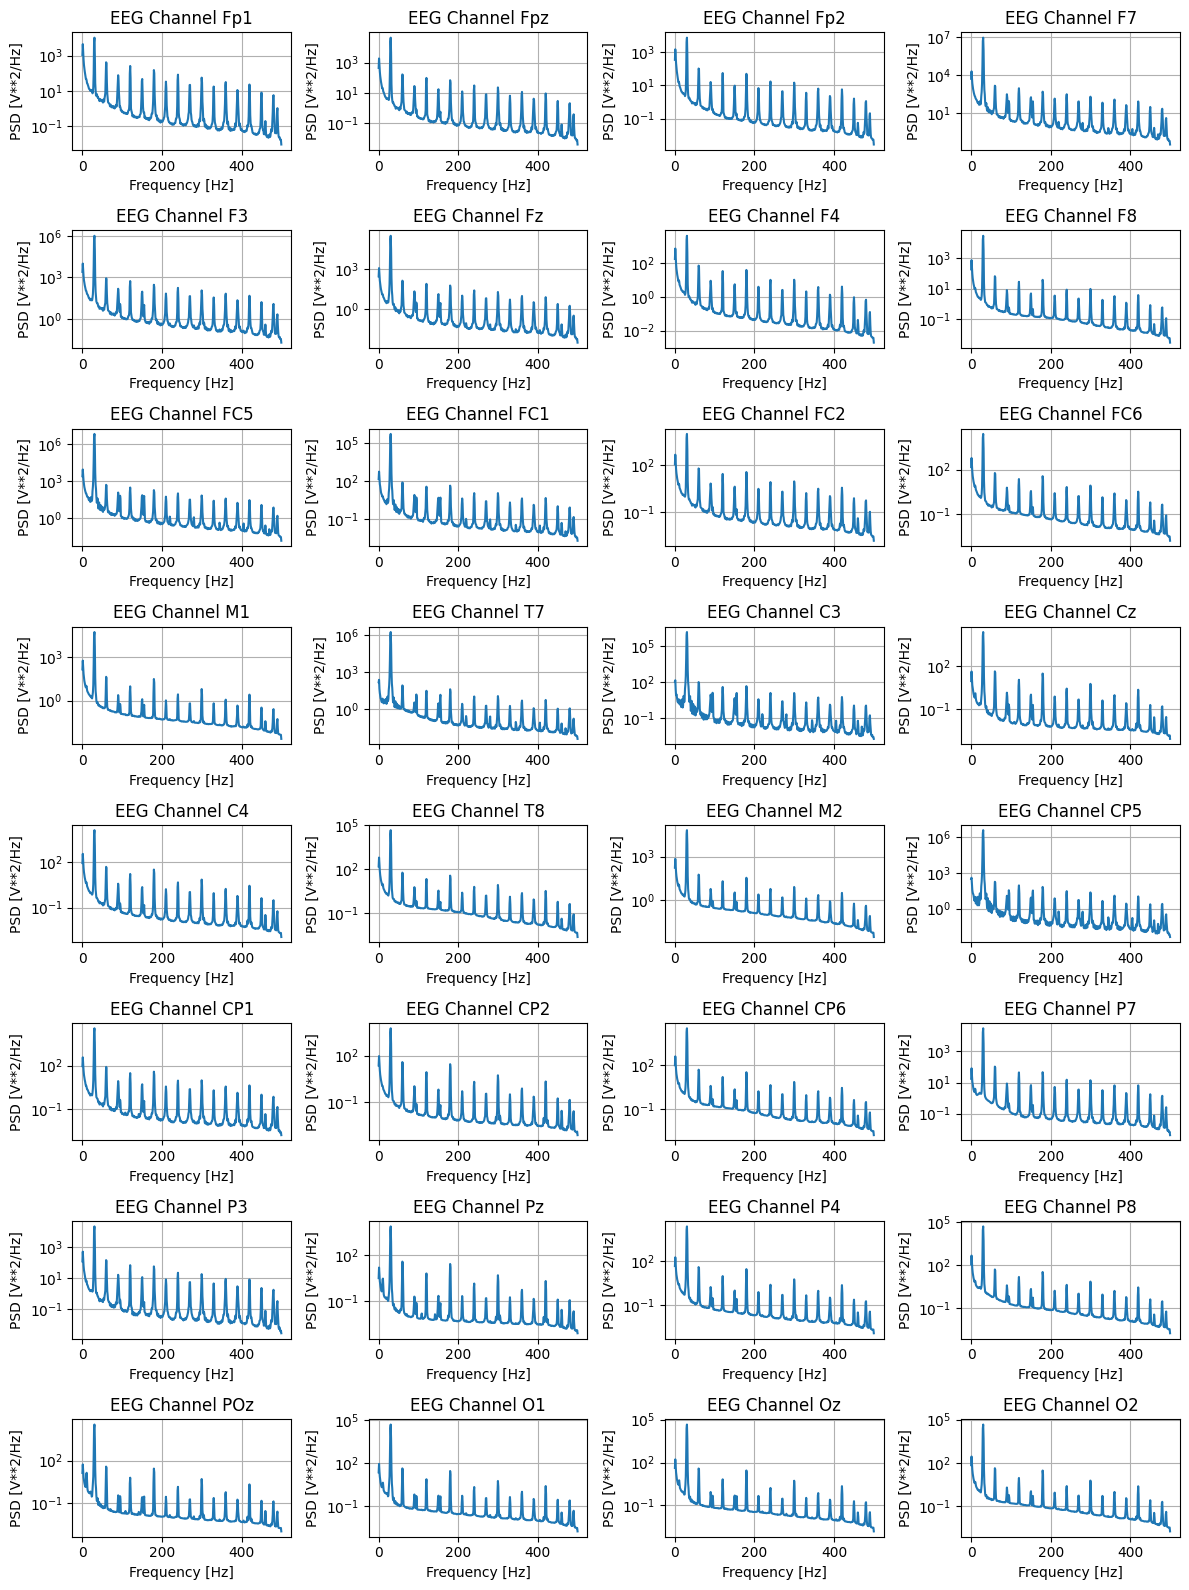

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Load EEG data from the .npy file
eeg_data_array = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/eeg_data_with_channels.npy')

# Define the sampling frequency (if your data is sampled at 1 Hz, set fs to 1)
fs = 1000

# List of EEG channel names
eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

# Initialize an empty dictionary to store PSD values for each channel
psd_data = {}

# Loop through each EEG channel
for i, channel in enumerate(eeg_channels):
    # Select EEG data from the current channel
    eeg_data = eeg_data_array[:, i]
    
    # Use Welch's method to estimate the power spectral density
    frequencies, psd = signal.welch(eeg_data, fs, nperseg=1024)
    
    # Store the PSD values in the dictionary
    psd_data[channel] = psd

# Save the PSD data as a numpy array
save_path = '/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/psd_x.npy'
np.save(save_path, psd_data)

# Set up the subplot layout
num_channels = len(eeg_channels)
num_rows = (num_channels + 3) // 4
num_cols = min(num_channels, 4)

# Create a figure and axes for subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 2 * num_rows))
axs = axs.ravel()

# Loop through each EEG channel and plot the PSD
for i, channel in enumerate(eeg_channels):
    axs[i].semilogy(frequencies, psd_data[channel])
    axs[i].set_title(f'EEG Channel {channel}')
    axs[i].set_xlabel('Frequency [Hz]')
    axs[i].set_ylabel('PSD [V**2/Hz]')
    axs[i].grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Load and print head

In [2]:
import numpy as np

# Load the Welch's PSD data from the .npy file
psd_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/psd_x.npy', allow_pickle=True).item()

# List of EEG channel names
eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

# Print the head of the PSD data for each EEG channel
for channel in eeg_channels:
    psd_values = psd_data[channel]
    print(f'PSD values for EEG Channel {channel}:')
    print(psd_values[:10])  # Print the first 10 values of the PSD
    print('---')

PSD values for EEG Channel Fp1:
[1072.02066427 4428.33217889 1543.99015765  577.69600889  290.86115692
  186.69274852  124.970801     91.75194501   62.20293001   46.19224688]
---
PSD values for EEG Channel Fpz:
[ 444.90385838 1865.3244754   648.89181366  255.5525128   133.10765723
   83.6980627    55.27084048   40.32642515   27.80385458   20.39475874]
---
PSD values for EEG Channel Fp2:
[ 333.5262614  1403.50793909  528.24463822  211.75468605  107.61870254
   66.26761707   42.72505454   30.04265205   20.27936186   15.0087366 ]
---
PSD values for EEG Channel F7:
[ 4878.25152685 18874.69226439  5833.27095836  2161.23425216
  1191.66521906   748.41463106   495.10034944   364.77747908
   279.13561261   214.83142922]
---
PSD values for EEG Channel F3:
[ 2509.54033435 10105.3429866   3314.16175662  1225.77412892
   622.80438379   405.28894718   275.99042426   203.92714345
   142.07347755   108.945467  ]
---
PSD values for EEG Channel Fz:
[ 297.47581738 1244.13377667  385.6118701   144.518053

# Create features for the freq bands from Welch's

In [4]:
# Define the sampling frequency
# This depends on how your EEG data was collected.
# For example, if a data point was collected every second, fs would be 1.
fs = 1000

# List of EEG channel names
eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

# Use Welch's method to estimate the power spectral density
frequencies, psd = signal.welch(eeg_data, fs, nperseg=1024)

# Define frequency bands of interest (you can adjust these according to your requirements)
delta_band = (1, 4)    # Delta band (1-4 Hz)
theta_band = (4, 8)    # Theta band (4-8 Hz)
alpha_band = (8, 13)   # Alpha band (8-13 Hz)
beta_band = (13, 30)   # Beta band (13-30 Hz)

# Find indices corresponding to each frequency band
delta_indices = np.where((frequencies >= delta_band[0]) & (frequencies <= delta_band[1]))[0]
theta_indices = np.where((frequencies >= theta_band[0]) & (frequencies <= theta_band[1]))[0]
alpha_indices = np.where((frequencies >= alpha_band[0]) & (frequencies <= alpha_band[1]))[0]
beta_indices = np.where((frequencies >= beta_band[0]) & (frequencies <= beta_band[1]))[0]

# Extract power values for each frequency band
delta_power = np.nanmean(psd[delta_indices])
theta_power = np.nanmean(psd[theta_indices])
alpha_power = np.nanmean(psd[alpha_indices])
beta_power = np.nanmean(psd[beta_indices])

# Create a feature array from the power values
features = np.array([delta_power, theta_power, alpha_power, beta_power])

# Save the features as a numpy array
save_path = '/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/welchs_x.npy'
np.save(save_path, features)

In [3]:
# Load the saved features
loaded_features = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/welchs_x.npy')

# Print the head of the loaded features
print("Loaded Features:")
print(loaded_features[:5])  # Print the first 5 elements of the loaded features

Loaded Features:
[  45.2211493     7.44886422    3.62570384 1479.36679419]


# Fast Fourier Transform

<div style="font-size: 13px; font-family: 'Times New Roman', Times, serif; background-color: #181818; color: #D0D0D0; padding: 20px; border-radius: 8px; margin: 10px; display: flex; flex-wrap: nowrap; justify-content: space-between;">
    <!-- Column 1 -->
    <div style="flex: 1; margin-right: 10px;">
        <h2>Introduction</h2>
        <p>This analysis is focused on computing the Power Spectral Density (PSD) of electroencephalogram (EEG) data via Fast Fourier Transform (FFT). Understanding the frequency composition of EEG signals has critical applications in neuroscience research and diagnostics.</p>
        <h2>Objectives</h2>
        <ul>
            <li>Data Selection: Extract the EEG data for individual channels.</li>
            <li>Fourier Analysis: Compute the PSD using FFT.</li>
            <li>Data Visualization: Render the computed PSD values.</li>
        </ul>
        <h2>Mathematical Formulations</h2>
        <h3>Data Selection and Parameter Definition</h3>
        <p>The EEG data, represented by the array \( \text{eeg\_data\_array} \), is segregated into individual channels. The sampling frequency \( f_s \) is defined to establish the time intervals between successive samples.</p>
       <h3>FFT-based PSD Computation</h3>
        <p>For each EEG channel, the FFT is computed as per the following formula:</p>
        \[ \text{FFT}(x) = \sum_{n=0}^{N-1} x[n] \cdot e^{-j \cdot 2 \pi \cdot f \cdot n / N} \]
        <p>Subsequently, PSD is derived from the FFT values using:</p>
        \[ \text{PSD} = |\text{FFT}(x)|^2 \]
    </div>
    <!-- Column 2 -->
    <div style="flex: 1; margin-left: 10px;">
        <h2>Computational Steps</h2>
        <p>A Python loop enumerates through each EEG channel, extracts the corresponding EEG data, and computes the PSD using FFT. The PSD values for each channel are stored in a Python dictionary, \( \text{fft\_psd\_data} \).</p>
        <h2>Data Visualization</h2>
        <p>The frequency components of the PSD are plotted using Matplotlib. The frequency axis is determined by the function \( \text{fftfreq} \), which takes into account the length of the PSD and the sampling frequency. Each subplot corresponds to a specific EEG channel, and the y-axis employs a logarithmic scale to improve clarity.</p>
        <h2>Data Storage</h2>
        <p>The computed PSD values are saved as a single NumPy file for further analysis or scientific research. The saved path is specified, and the data is serialized in the .npy format.</p>
        <h2>Scientific Relevance</h2>
        <p>The FFT-based approach to PSD analysis serves as a robust technique for investigating neural oscillations, brain connectivity, and other physiological phenomena of interest. The method is computationally efficient and widely applicable in both research and clinical settings.</p>
    </div>
</div>

Populated keys in fft_psd_data: ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']


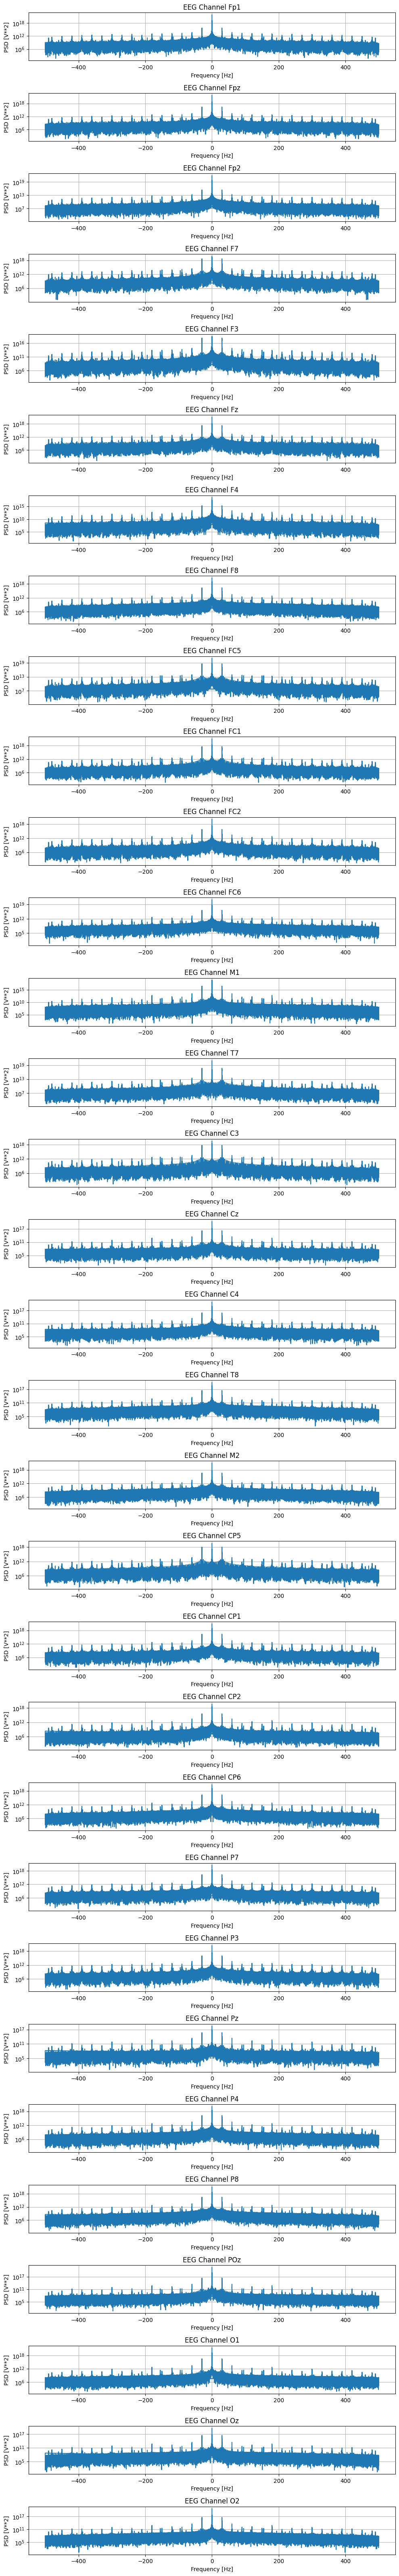

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sampling frequency and other parameters
fs = 1000

# List of EEG channel names
eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

# Initialize an empty dictionary to store FFT PSD values for each channel
fft_psd_data = {}

# Loop through each EEG channel
for i, channel in enumerate(eeg_channels):
    # Select EEG data from the current channel
    eeg_data = eeg_data_array[:, i]
    
    # Compute the FFT
    fft_result = np.fft.fft(eeg_data)
    psd = np.abs(fft_result) ** 2
    
    # Store the PSD values in the dictionary
    fft_psd_data[channel] = psd

# Print the populated keys in fft_psd_data
print("Populated keys in fft_psd_data:", list(fft_psd_data.keys()))

# Plot the FFT PSD data for each channel
fig, axs = plt.subplots(len(eeg_channels), figsize=(10, 2 * len(eeg_channels)))
for i, channel in enumerate(eeg_channels):
    psd = fft_psd_data.get(channel)  # Use get method to handle missing keys gracefully
    if psd is not None:
        frequencies = np.fft.fftfreq(len(psd), d=1/fs)
        axs[i].semilogy(frequencies, psd)
        axs[i].set_title(f'EEG Channel {channel}')
        axs[i].set_xlabel('Frequency [Hz]')
        axs[i].set_ylabel('PSD [V**2]')
        axs[i].grid(True)
    else:
        print(f"PSD data for channel {channel} is missing.")

plt.tight_layout()
plt.show()

# Save the FFT PSD data for all channels as a single numpy file
combined_fft_psd_data = {channel: psd for channel, psd in fft_psd_data.items()}
save_path = '/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/combined_fft_psd_x.npy'
np.save(save_path, combined_fft_psd_data)

# Load and print head

In [4]:
# Load the FFT PSD data from the .npy file
fft_psd_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/combined_fft_psd_x.npy', allow_pickle=True).item()

# Print the first few elements of the FFT PSD data for each channel
for channel, psd in fft_psd_data.items():
    print(f"Channel: {channel}")
    print(psd[:10])  # Print the first 10 elements of the PSD data
    print("-" * 40)  # Separator

Channel: Fp1
[7.28963963e+21 1.24311775e+19 3.84437124e+18 1.50054982e+18
 5.47792867e+17 1.22997017e+17 5.55828228e+17 3.58984194e+17
 4.73666146e+16 1.35993709e+17]
----------------------------------------
Channel: Fpz
[6.03276852e+21 5.31820677e+18 2.39304919e+18 1.55151403e+18
 3.75985824e+17 5.43709124e+16 7.01198233e+17 5.02326335e+17
 6.26644662e+16 1.59748986e+17]
----------------------------------------
Channel: Fp2
[6.75803250e+21 4.50607226e+19 1.15541972e+19 4.88685804e+18
 1.91102436e+18 1.26603945e+18 1.60218132e+18 1.12637836e+18
 4.34645747e+17 4.74233918e+17]
----------------------------------------
Channel: F7
[6.06932155e+19 2.59919187e+18 9.29845007e+18 1.87094675e+19
 3.04965105e+18 7.23207327e+18 9.40525973e+18 8.22306392e+18
 6.53823302e+18 6.65212580e+18]
----------------------------------------
Channel: F3
[1.06698056e+18 2.00267103e+18 6.64187858e+17 2.11363472e+18
 6.20451925e+16 5.20391230e+17 3.10741423e+17 2.36849782e+17
 4.01051855e+17 3.24267807e+17]
---

# Lomb-Scargle periodogram

In [ ]:
from scipy.signal import lombscargle
import numpy as np
import matplotlib.pyplot as plt

# Define the sampling frequency and other parameters
fs = 1000

# List of EEG channel names
eeg_channels = ['Fp1']

# Initialize a dictionary to store Lomb-Scargle periodograms for each channel
lomb_scargle_data = {}

# Loop through each EEG channel
for channel in eeg_channels:
    channel_index = eeg_channels.index(channel)
    eeg_data = eeg_data_array[:, channel_index]
    
    # Compute Lomb-Scargle periodogram
    time = np.arange(len(eeg_data)) / fs
    frequencies = np.linspace(0.001, 500, 1000)
    periodogram = lombscargle(time, eeg_data, frequencies, normalize=True)
    
    # Store the periodogram in the dictionary
    lomb_scargle_data[channel] = periodogram

# Save the Lomb-Scargle periodogram data for all channels as a single numpy file
save_path = '/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/LombScarglePeriodograms_x.npy'
np.save(save_path, lomb_scargle_data)

# Set up plot layout parameters
num_channels = len(eeg_channels)
num_columns = 4
num_rows = -(-num_channels // num_columns)  # Ceiling division

# Compute plot size based on your requirements
fig_width = 20  # Adjust as needed for the width
fig_height = num_rows * 3  # Each plot should be 3 times taller

# Create subplots in a 4-column layout
fig, axes = plt.subplots(num_rows, num_columns, figsize=(fig_width, fig_height), sharex=True)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each EEG channel and plot the Lomb-Scargle periodograms
for i, channel in enumerate(eeg_channels):
    periodogram = lomb_scargle_data[channel]
    frequencies = np.linspace(0.001, 500, 1000)
    
    # Plot the Lomb-Scargle periodogram on the appropriate subplot
    ax = axes[i]
    ax.plot(frequencies, periodogram)
    ax.set_title(f'EEG Channel {channel}')
    ax.set_ylabel('Power Spectral Density')
    ax.grid(True)

# Set common xlabel for the last row of subplots
for ax in axes[-num_columns:]:
    ax.set_xlabel('Frequency [Hz]')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Load and print head

In [7]:
# Load the Lomb-Scargle periodogram data from the .npy file
lomb_scargle_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/LombScarglePeriodograms_x.npy', allow_pickle=True).item()

# Print the first few elements of the Lomb-Scargle periodogram data for each channel
for channel, periodogram in lomb_scargle_data.items():
    print(f"Channel: {channel}")
    print(periodogram[:10])  # Print the first 10 elements of the periodogram data
    print("-" * 40)  # Separator

Channel: Fp1
[0.1610684  0.16106555 0.16105702 0.16104282 0.16102294 0.16099739
 0.16096616 0.16092926 0.16088668 0.16083843]
----------------------------------------
Channel: Fpz
[0.16152559 0.16152273 0.16151419 0.16149996 0.16148004 0.16145443
 0.16142313 0.16138615 0.16134347 0.16129511]
----------------------------------------
Channel: Fp2
[0.1621703  0.16216743 0.16215885 0.16214456 0.16212456 0.16209885
 0.16206743 0.1620303  0.16198746 0.16193891]
----------------------------------------
Channel: F7
[0.16233026 0.16232739 0.16231879 0.16230448 0.16228445 0.1622587
 0.16222723 0.16219004 0.16214714 0.16209851]
----------------------------------------
Channel: F3
[0.16274206 0.16273918 0.16273057 0.16271622 0.16269614 0.16267033
 0.16263879 0.16260151 0.16255849 0.16250974]
----------------------------------------
Channel: Fz
[0.16225916 0.16225628 0.16224769 0.16223338 0.16221336 0.16218761
 0.16215614 0.16211895 0.16207605 0.16202742]
----------------------------------------
Ch

# Wavelet Transform

<div style="font-size: 13px; font-family: 'Times New Roman', Times, serif; background-color: #181818; color: #D0D0D0; padding: 20px; border-radius: 8px; margin: 10px; display: flex; flex-wrap: nowrap; justify-content: space-between;">
    <!-- Column 1 -->
    <div style="flex: 1; margin-right: 10px;">
        <h2>Introduction</h2>
        <p>This scholarly overview elucidates the computational pipeline for frequency decomposition of electroencephalogram (EEG) data using wavelet transform. The technique provides an alternative to Fourier-based methods and allows for time-frequency localization.</p>
        <h2>Objectives</h2>
        <ul>
            <li>Channel-based Data Selection: Individual EEG channels are parsed from the master dataset.</li>
            <li>Continuous Wavelet Transform: Application of the wavelet transform to the EEG data.</li>
            <li>Power Spectral Density Estimation: Deriving PSD from the wavelet coefficients.</li>
            <li>Visualization: Time-frequency representation of the wavelet-based PSD.</li>
        </ul>
        <h2>Mathematical Foundations</h2>
        <h3>Wavelet Transform</h3>
        <p>The Continuous Wavelet Transform (CWT) is mathematically formulated as:</p>
        \[ CWT(x, a, b) = \frac{1}{\sqrt{a}} \int x(t) \psi^*\left(\frac{t-b}{a}\right)dt \]
        <p>Where \( \psi(t) \) is the mother wavelet and \( a \) and \( b \) are the scale and translation parameters respectively.</p>
        <h3>Power Spectral Density (PSD)</h3>
        <p>PSD is derived from the wavelet coefficients as:</p>
        \[ \text{PSD} = | \text{coefficients} |^2 \]
    </div>
    <!-- Column 2 -->
    <div style="flex: 1; margin-left: 10px;">
        <h2>Computational Steps</h2>
        <p>Each EEG channel undergoes the following computational steps:</p>
        <ul>
            <li>EEG data for the channel is extracted.</li>
            <li>Wavelet transform is applied to the EEG data using the Morlet wavelet.</li>
            <li>PSD is calculated from the absolute square of the wavelet coefficients.</li>
        </ul>
        <h2>Data Visualization</h2>
        <p>Frequency decomposition is visualized as an image plot. The x-axis represents time, while the y-axis represents frequency. The colors indicate the magnitude of the PSD at each time-frequency point, following the 'inferno' colormap for better visual discrimination.</p>
        <h2>Data Serialization</h2>
        <p>PSD values are saved as a NumPy file, adhering to a specified directory path. This ensures easy retrieval for subsequent analyses or publications.</p>
        <h2>Scientific Implications</h2>
        <p>Wavelet-based methods for time-frequency analysis offer finer granularity and are particularly advantageous for non-stationary signals like EEG. This approach is pivotal for neuroscientific studies related to brain oscillations, event-related potentials, and cognitive states.</p>
    </div>
</div>

In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Define the sampling frequency and other parameters
fs = 1000

# List of EEG channel names
eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

# Initialize a dictionary to store wavelet transform PSD values for each channel
wavelet_psd_data = {}

# Loop through each EEG channel
for channel in eeg_channels:
    channel_index = eeg_channels.index(channel)
    eeg_data = eeg_data_array[:, channel_index]
    
    frequencies = np.logspace(np.log10(0.1), np.log10(30), num=100)
    coefficients, _ = pywt.cwt(eeg_data, frequencies, wavelet='morl')
    psd = np.abs(coefficients)**2
    
    # Store the PSD values in the dictionary
    wavelet_psd_data[channel] = psd

# Save the wavelet transform PSD data for all channels as a single numpy file
save_path = '/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/wavelet_psd_data_x.npy'
np.savez(save_path, **wavelet_psd_data)

# Loop through each EEG channel and plot the wavelet transform PSDs
for channel in eeg_channels:
    psd = wavelet_psd_data[channel]
    frequencies = np.logspace(np.log10(0.1), np.log10(30), num=100)
    
    # Plot the wavelet transform PSD for the current channel
    plt.imshow(psd, extent=[0, len(eeg_data_array), frequencies[-1], frequencies[0]],
               aspect='auto', cmap='inferno')
    plt.title(f'EEG Channel {channel}')
    plt.xlabel('Time [s]')
    plt.ylabel('Frequency [Hz]')
    plt.grid(False)
    plt.show()

# Load and print head

In [ ]:
# Load the wavelet transform PSD data from the .npz file
wavelet_psd_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/wavelet_psd_data_x.npy', allow_pickle=True)

# Print the populated keys in wavelet_psd_data
print("Populated keys in wavelet_psd_data:", list(wavelet_psd_data.keys()))

# Print the first few elements of the wavelet transform PSD data for each channel
for channel, psd in wavelet_psd_data.items():
    print(f"Channel: {channel}")
    print(psd[:10])  # Print the first 10 elements of the PSD data
    print("-" * 40)  # Separator

# Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) 

<div style="font-size: 13px; font-family: 'Times New Roman', Times, serif; background-color: #181818; color: #D0D0D0; padding: 20px; border-radius: 8px; margin: 10px; display: flex; flex-wrap: nowrap; justify-content: space-between;">
    <!-- Column 1 -->
    <div style="flex: 1; margin-right: 10px;">
        <h2>Introduction</h2>
        <p>We present an advanced analytical framework for evaluating the AutoCorrelation Function (ACF) and Partial AutoCorrelation Function (PACF) in EEG data. These statistical measures reveal critical aspects about signal periodicity and are essential for various time-series analyses.</p>
        <h2>Objectives</h2>
        <ul>
            <li>Channel-wise EEG Data Extraction</li>
            <li>ACF and PACF Calculation</li>
            <li>Data Serialization</li>
        </ul>
        <h2>Mathematical Background</h2>
        <h3>AutoCorrelation Function (ACF)</h3>
        \[ \text{ACF}(\tau) = \frac{\sum_{t=1}^{T-\tau} (x_t - \bar{x})(x_{t+\tau} - \bar{x})}{\sum_{t=1}^T (x_t - \bar{x})^2} \]
        <p>Where \( \tau \) is the time lag, \( x_t \) is the data point at time \( t \), and \( \bar{x} \) is the mean of the dataset.</p>
        <h3>Partial AutoCorrelation Function (PACF)</h3>
        <p>It isolates the correlation between a variable and a lagged version of itself that is not explained by correlations at all lower-order lags. Mathematically, PACF can be derived from the autoregressive model of the data.</p>
    </div>
    <!-- Column 2 -->
    <div style="flex: 1; margin-left: 10px;">
        <h2>Computational Procedures</h2>
        <ul>
            <li>EEG data corresponding to each channel is isolated.</li>
            <li>ACF and PACF are calculated for up to 10 lags.</li>
        </ul>
        <h2>Data Storage</h2>
        <p>The calculated ACF and PACF values are stored in a dictionary, which is then serialized into a single NumPy file. This ensures efficient storage and easy access for future investigations.</p>
        <h2>Implications</h2>
        <p>Understanding ACF and PACF provides insights into the underlying periodic behaviors in EEG signals, which is crucial for detecting anomalies, understanding brain functions, and various other applications in neuroscience. These functions often serve as the stepping stone for more complex time-series analyses including ARIMA models.</p>
        <h2>Conclusion</h2>
        <p>This comprehensive framework paves the way for a robust time-series analysis of EEG data, offering a deeper understanding of neurophysiological phenomena.</p>
    </div>
</div>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# List of EEG channel names
eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

# Initialize a dictionary to store ACF and PACF plots for each channel
acf_pacf_data = {}

# Loop through each EEG channel
for channel in eeg_channels:
    channel_index = eeg_channels.index(channel)
    eeg_data = eeg_data_array[:, channel_index]
    
    # Calculate ACF and PACF values
    acf_vals, _ = plot_acf(eeg_data, lags=10, show=False)
    pacf_vals, _ = plot_pacf(eeg_data, lags=10, show=False)
    
    # Store the ACF and PACF data in the dictionary
    acf_pacf_data[channel] = {'acf': acf_vals, 'pacf': pacf_vals}

# Save the ACF and PACF data for all channels as a single numpy file
save_path = '/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/acf_pacf_data_x.npy'
np.save(save_path, acf_pacf_data)

# Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC)

<div style="font-size: 13px; font-family: 'Times New Roman', Times, serif; background-color: #181818; color: #D0D0D0; padding: 20px; border-radius: 8px; margin: 10px; display: flex; flex-wrap: nowrap; justify-content: space-between;">
    <!-- Column 1 -->
    <div style="flex: 1; margin-right: 10px;">
        <h2>Introduction</h2>
        <p>This analytical framework is designed to employ the AutoRegressive (AR) model for scrutinizing electroencephalogram (EEG) data. AR models are quintessential in capturing the inherent linearity in temporal data and offer both Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) for model selection.</p>
        <h2>Objectives</h2>
        <ul>
            <li>Channel-wise extraction of EEG Data</li>
            <li>Modeling via AutoRegressive (AR) analysis</li>
            <li>Calculation of AIC and BIC for model optimization</li>
            <li>Serializing the derived metrics</li>
        </ul>
        <h2>Mathematical Premise</h2>
        <h3>AutoRegressive (AR) Model</h3>
        \[ X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \ldots + \phi_p X_{t-p} + \epsilon_t \]
        <p>Where \( X_t \) is the data at time \( t \), \( c \) is a constant, \( \phi \) are the model parameters, \( p \) is the lag order, and \( \epsilon_t \) is the error term.</p>
        <h3>Akaike Information Criterion (AIC)</h3>
        \[ \text{AIC} = 2k - 2\ln(\hat{L}) \]
        <p>Where \( k \) is the number of parameters and \( \hat{L} \) is the maximum value of the likelihood function for the estimated model.</p>
    </div>
    <!-- Column 2 -->
    <div style="flex: 1; margin-left: 10px;">
        <h2>Computation Details</h2>
        <ul>
            <li>EEG data for each channel is individually processed.</li>
            <li>For each channel, AR models for lag values ranging from 1 to 20 are fit.</li>
            <li>AIC and BIC are computed for each fitted model, aiding in optimal lag selection.</li>
        </ul>
        <h2>Data Serialization</h2>
        <p>The AIC and BIC values are preserved in a dictionary and serialized into a NumPy data file for efficient storage and straightforward future access.</p>
        <h2>Scientific Significance</h2>
        <p>Understanding the AIC and BIC values allows for the selection of an optimally parsimonious model, balancing both goodness-of-fit and complexity. These metrics are invaluable in neuroscience for anomaly detection, system identification, and even predicting future states of EEG signals.</p>
        <h2>Conclusion</h2>
        <p>The analysis framework not only aids in optimal model selection for EEG data but also offers robust performance metrics that can be critical for various neuroscience applications.</p>
    </div>
</div>

In [ ]:
import numpy as np
from statsmodels.tsa.ar_model import AutoReg

# Define the range of lag values to consider
lag_values = range(1, 21)  # e.g., consider lag values from 1 to 20

# List of EEG channel names
eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

# Initialize dictionaries to store the AIC and BIC values for each EEG channel
aic_values_dict = {}
bic_values_dict = {}

# Loop through each EEG channel
for channel in eeg_channels:
    channel_index = eeg_channels.index(channel)
    eeg_data = eeg_data_array[:, channel_index]
    
    aic_values = []
    bic_values = []
    
    # Fit AutoReg models and calculate AIC and BIC values for each lag
    for lag in lag_values:
        mod = AutoReg(eeg_data, lags=lag)
        res = mod.fit()
        aic_values.append(res.aic)
        bic_values.append(res.bic)
    
    aic_values_dict[channel] = aic_values
    bic_values_dict[channel] = bic_values

# Save the AIC and BIC values for all EEG channels as a single numpy file
save_path = '/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/ar_model_aic_bic_x.npy'
np.savez(save_path, aic_values_dict=aic_values_dict, bic_values_dict=bic_values_dict)

In [ ]:
# Akaike Information Criterion
aic = res.aic
print("AIC: ", aic)

# Bayesian Information Criterion
bic = res.bic
print("BIC: ", bic)

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg

# List of EEG channel names
eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

# Define a range of lag values to consider
lag_values = range(1, 21)  # e.g., consider lag values from 1 to 20

# Initialize dictionaries to store the AIC and BIC values for each EEG channel
aic_values_dict = {}
bic_values_dict = {}

# Split the data into training and testing sets (adjust num_train as needed)
num_train = int(0.8 * len(eeg_data_array[0]))  # Assuming each channel is a column in the array
train_data = eeg_data_array[:, :num_train]

# Loop through each EEG channel
for channel_index, channel in enumerate(eeg_channels):
    # Select EEG data from the current channel
    eeg_data = train_data[channel_index]
    
    # Initialize lists to store the AIC and BIC values for the current channel
    aic_values = []
    bic_values = []
    
    # For each lag value, fit the AutoReg model and calculate AIC and BIC
    for lag in lag_values:
        mod = AutoReg(eeg_data, lags=lag, old_names=False)
        res = mod.fit()
        
        # Compute AIC and BIC
        aic = res.aic
        bic = res.bic
        
        aic_values.append(aic)
        bic_values.append(bic)
    
    # Store the AIC and BIC values in the dictionaries
    aic_values_dict[channel] = aic_values
    bic_values_dict[channel] = bic_values

# Save the AIC and BIC values for all EEG channels as a single numpy file
save_path = '/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/ar_model_aic_bic_allchannels_x.npy'
np.savez(save_path, aic_values_dict=aic_values_dict, bic_values_dict=bic_values_dict)

In [ ]:
# Choose the best lag based on the lowest AIC value
best_lag_aic = np.argmin(aic_values) + 1

# Choose the best lag based on the lowest BIC value
best_lag_bic = np.argmin(bic_values) + 1

print("Best lag based on AIC:", best_lag_aic)
print("Best lag based on BIC:", best_lag_bic)

In [ ]:
import numpy as np
from statsmodels.tsa.ar_model import AutoReg

# List of EEG channel names
eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

# Given sampling frequency (fs)
fs = 1000

# Set up the folder path to save the predicted values
save_folder_path = '/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/'

# Load the EEG data from the numpy file
eeg_data_array = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/eeg_data_with_channels.npy')

# Initialize a dictionary to store the predicted values for each channel
predicted_values_dict = {}

# Loop through each EEG channel
for channel_index, eeg_channel in enumerate(eeg_channels):
    lag = 20
    eeg_data = eeg_data_array[:, channel_index]
    mod = AutoReg(eeg_data, lags=lag)
    res = mod.fit()
    periods_for_30_seconds = int(30 * fs)
    predictions = res.predict(start=len(eeg_data), end=len(eeg_data)+periods_for_30_seconds-1, dynamic=True)
    predicted_values_dict[eeg_channel] = predictions

# Save the predicted values for all EEG channels as a single numpy file
save_path = f'{save_folder_path}AutoRegressive_predicted_values_x.npy'
np.savez(save_path, **predicted_values_dict)

# Band Powers

<div style="font-size: 13px; font-family: 'Times New Roman', Times, serif; background-color: #181818; color: #D0D0D0; padding: 20px; border-radius: 8px; margin: 10px; display: flex; flex-wrap: nowrap; justify-content: space-between;">
    <!-- Column 1 -->
    <div style="flex: 1; margin-right: 10px;">
        <h2>Introduction</h2>
        <p>The present analysis employs Continuous Wavelet Transform (CWT) using Morlet wavelets to dissect the frequency components of EEG signals across multiple channels. The study aims to calculate and represent the power spectral density (PSD) in different frequency bands: Delta, Theta, Alpha, Beta, and Gamma.</p>
        <h2>Objectives</h2>
        <ul>
            <li>Decompose EEG signals into different frequency bands.</li>
            <li>Calculate the band power in each frequency range.</li>
            <li>Visualize the distribution of band powers over time.</li>
        </ul>
        <h2>Mathematical Foundations</h2>
        <h3>Continuous Wavelet Transform (CWT)</h3>
        \[ W(a,b) = \frac{1}{\sqrt{a}}\int x(t)\psi\left(\frac{t-b}{a}\right) dt \]
        <p>Where \( W(a,b) \) is the wavelet coefficient, \( a \) is the scale, \( b \) is the position, \( x(t) \) is the EEG signal, and \( \psi(t) \) is the Morlet wavelet.</p>
        <h3>Power Spectral Density (PSD)</h3>
        \[ \text{PSD}(f) = |W(a,b)|^2 \]
        <p>Where \( f \) corresponds to frequency, and \( |W(a,b)|^2 \) represents the magnitude of the wavelet coefficients squared.</p>        
        <h3>Band Power Calculation</h3>
        \[ \text{Band Power} = \int \text{PSD}(f) df \]
        <p>The trapezoidal rule is used for numerical integration to find the band power in each frequency range.</p>
    </div>
    <!-- Column 2 -->
    <div style="flex: 1; margin-left: 10px;">
        <h2>Methodology</h2>
        <ul>
            <li>EEG data for each channel is separately analyzed.</li>
            <li>Wavelet transform coefficients are calculated using the Morlet wavelet.</li>
            <li>PSD is derived from the absolute square of the wavelet coefficients.</li>
            <li>Band powers are computed by integrating the PSD across each frequency band.</li>
        </ul>
        <h2>Data Serialization</h2>
        <p>All calculated band powers are stored in a dictionary and serialized into a single NumPy data file for subsequent analysis and visualization.</p>
        <h2>Scientific and Clinical Implications</h2>
        <p>Band powers serve as biomarkers in various clinical and experimental settings, enabling better understanding of brain function, neurological conditions, and cognitive states. Accurate assessment of band powers can be instrumental for diagnosis, therapy planning, and real-time monitoring of brain activities.</p>
        <h2>Conclusion</h2>
        <p>The analytical procedure provides a comprehensive method for the quantitative assessment of EEG frequency components, enriching our understanding of brain dynamics and contributing significantly to neuroscientific research.</p>
    </div>
</div>

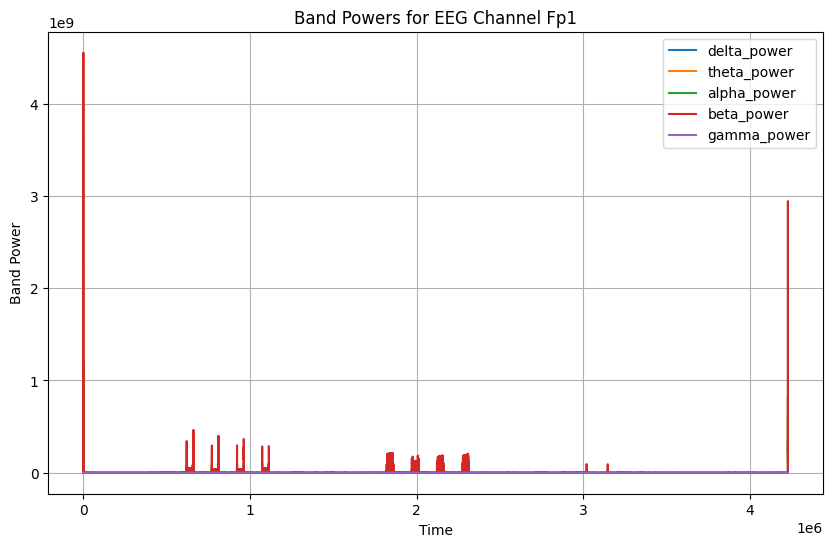

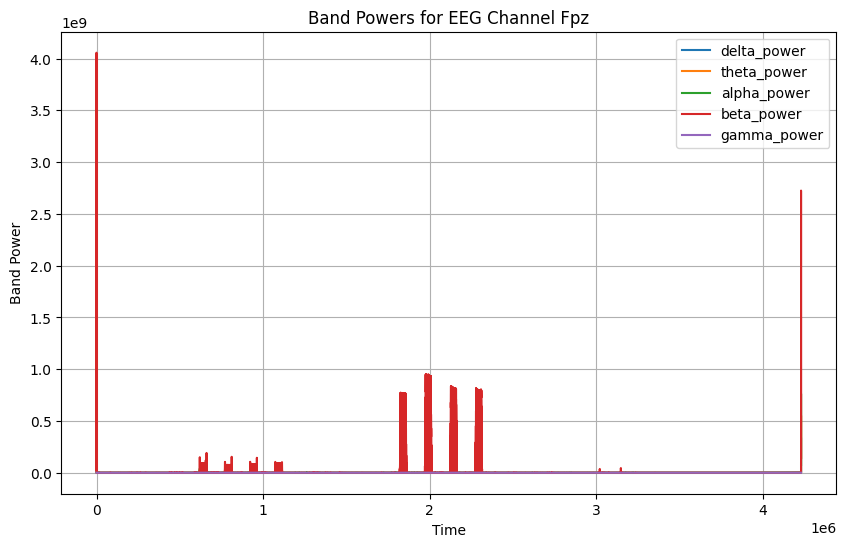

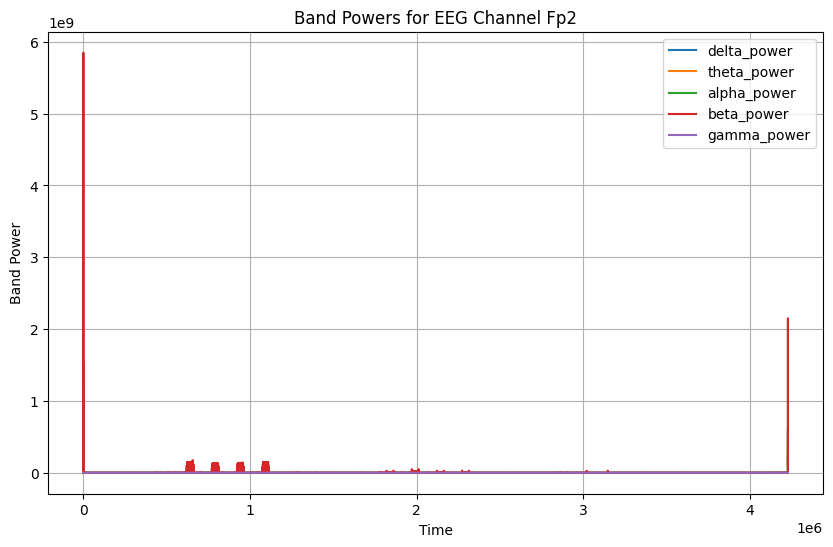

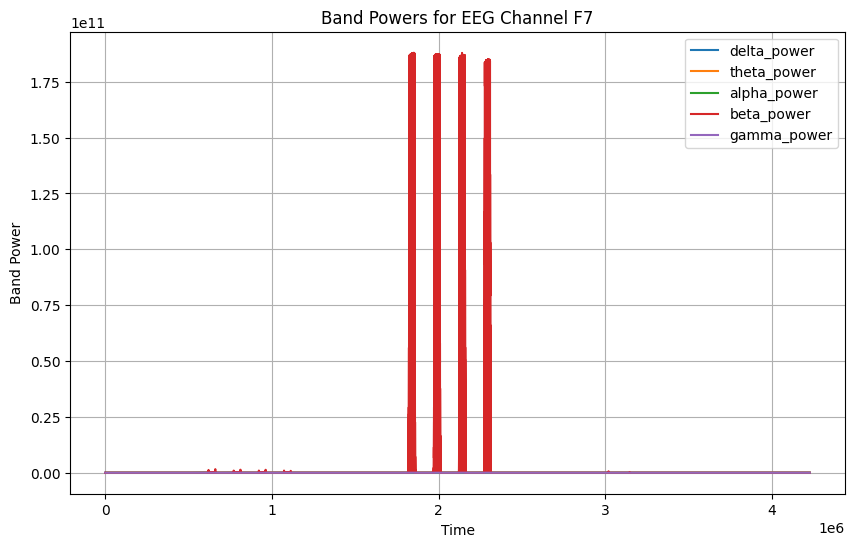

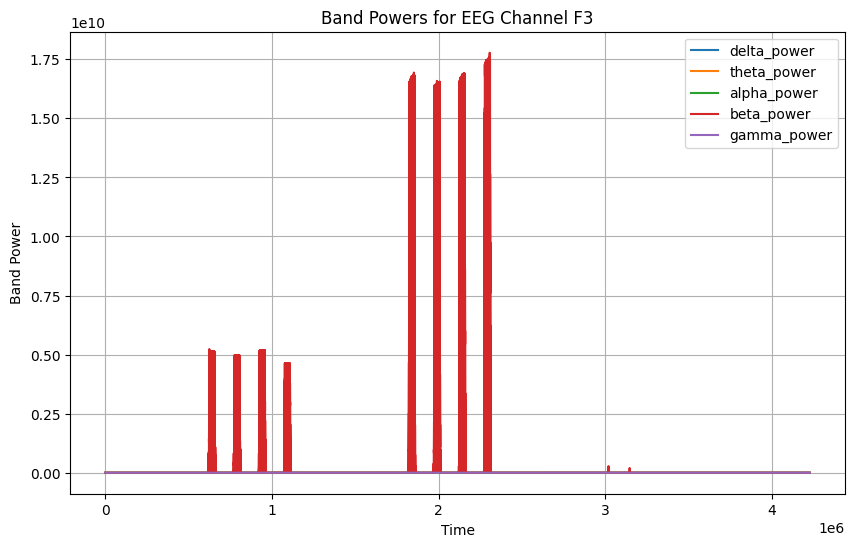

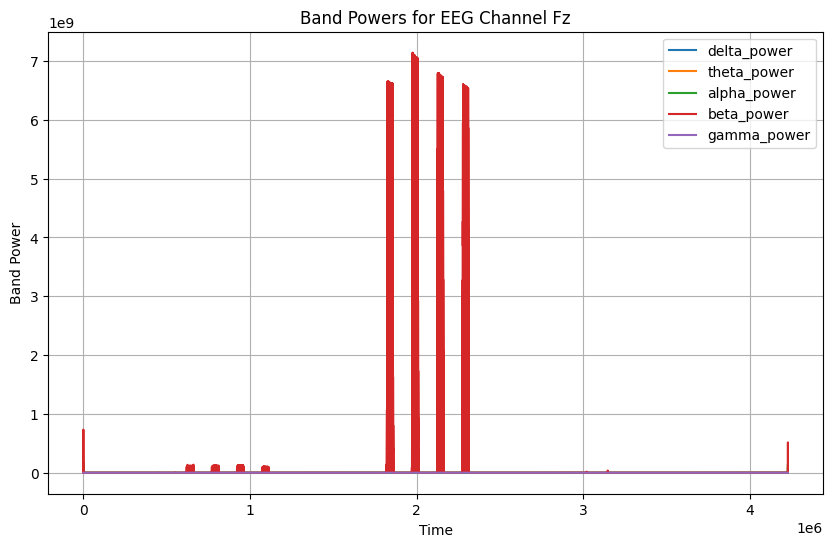

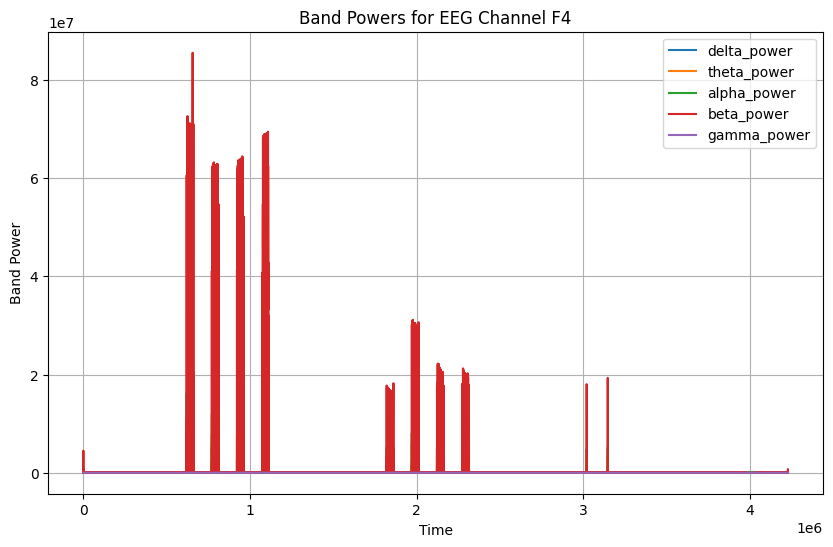

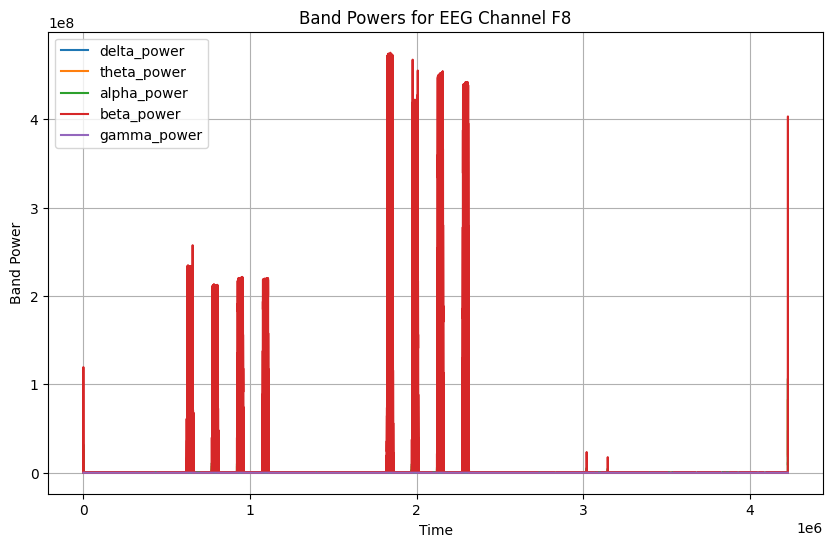

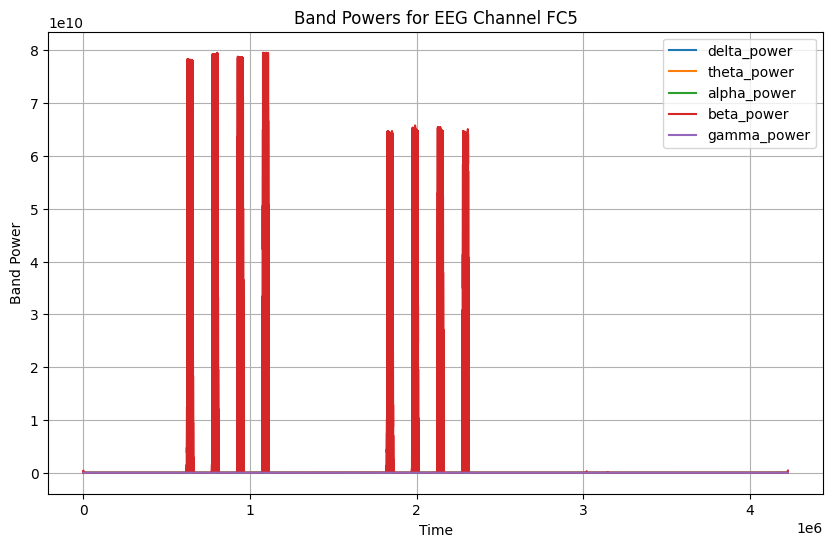

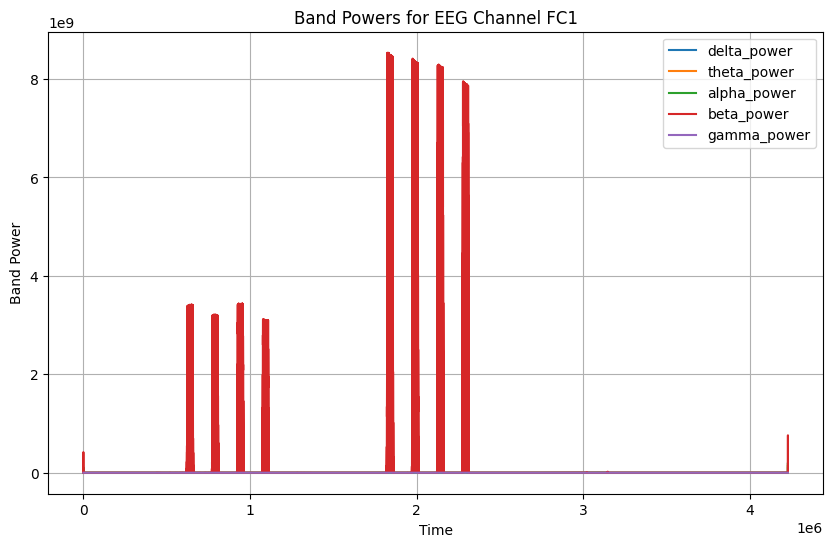

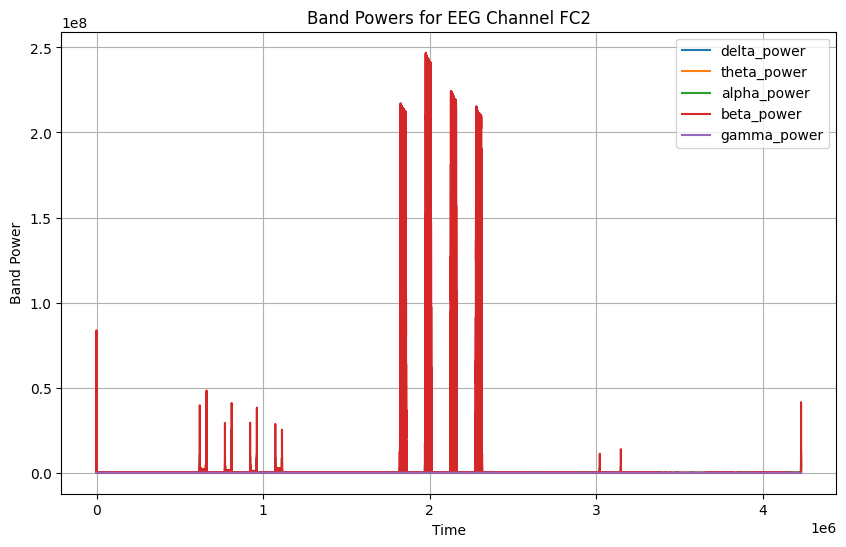

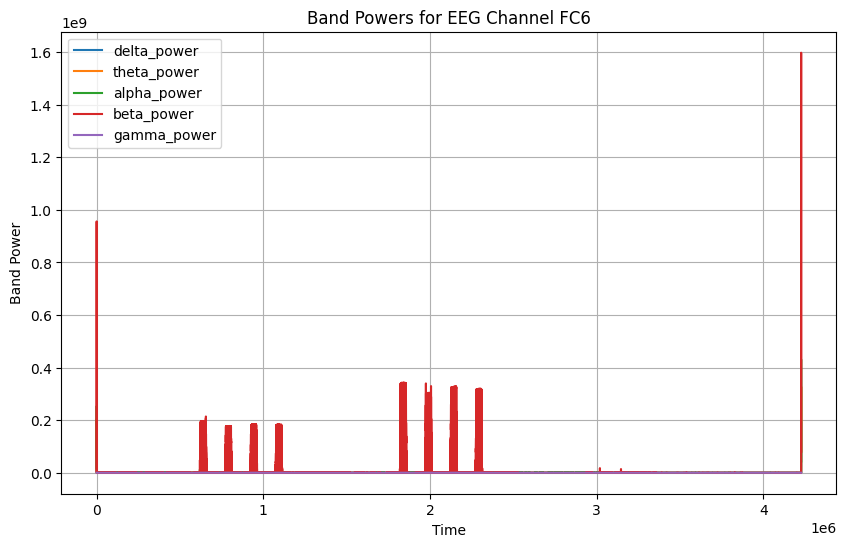

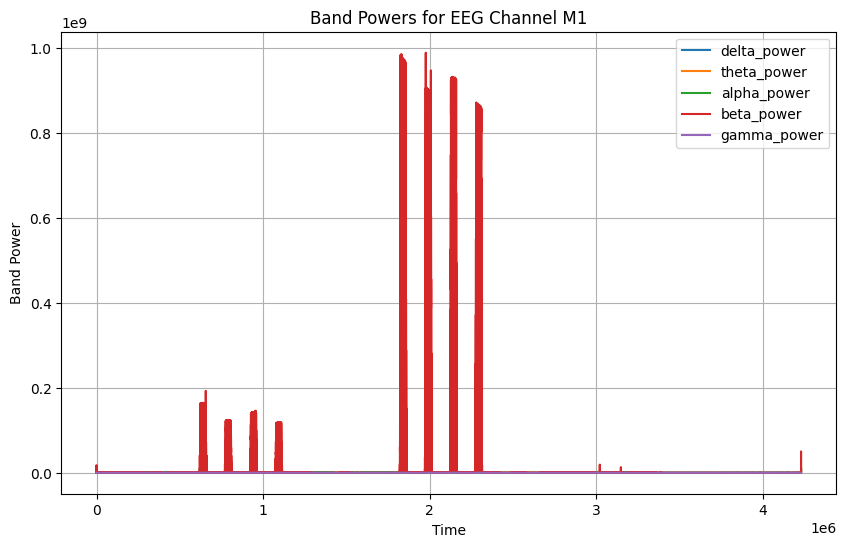

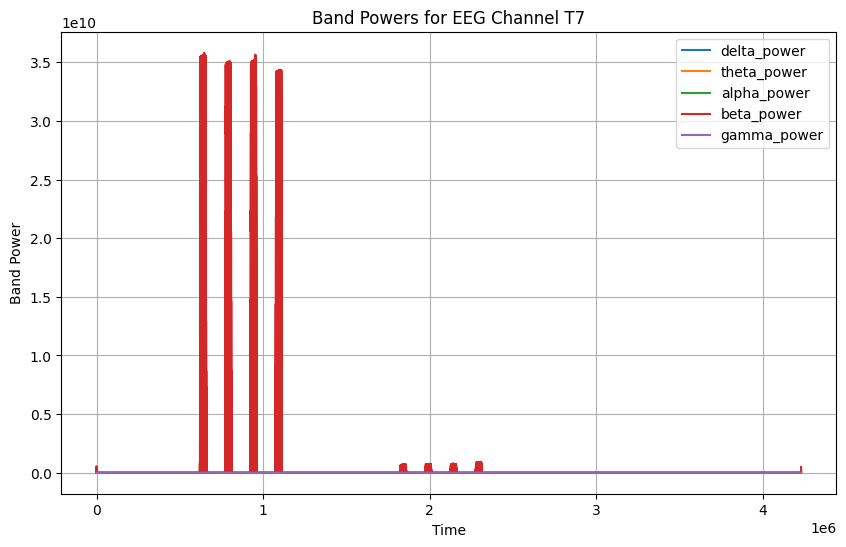

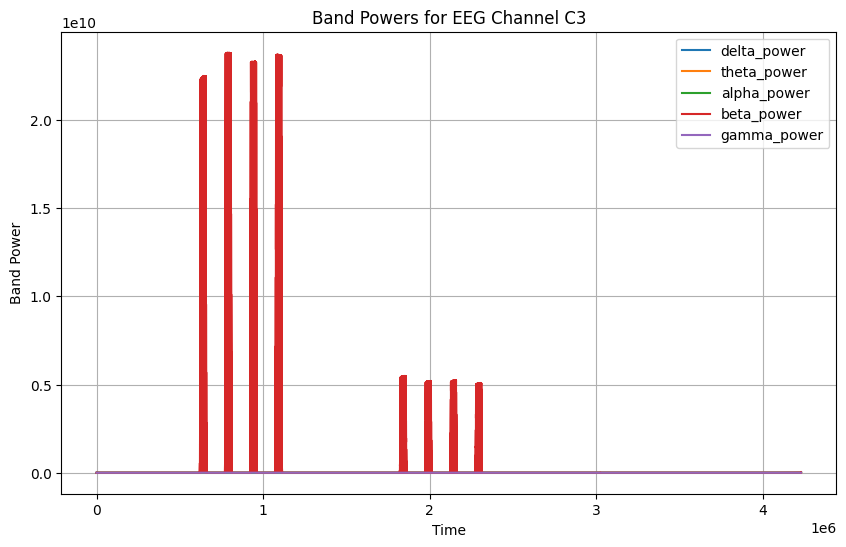

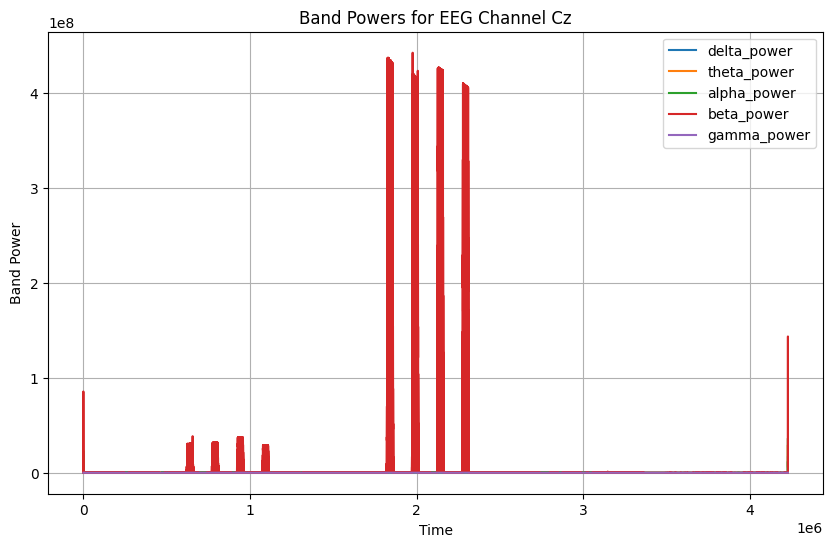

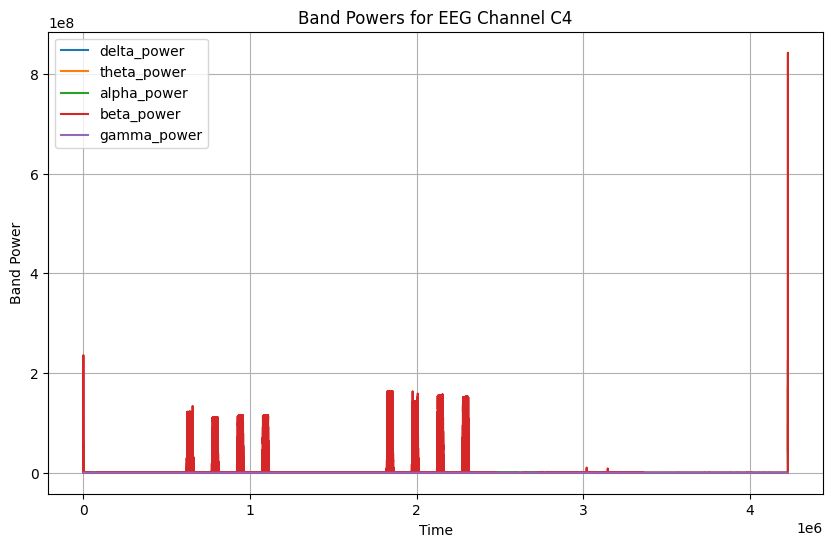

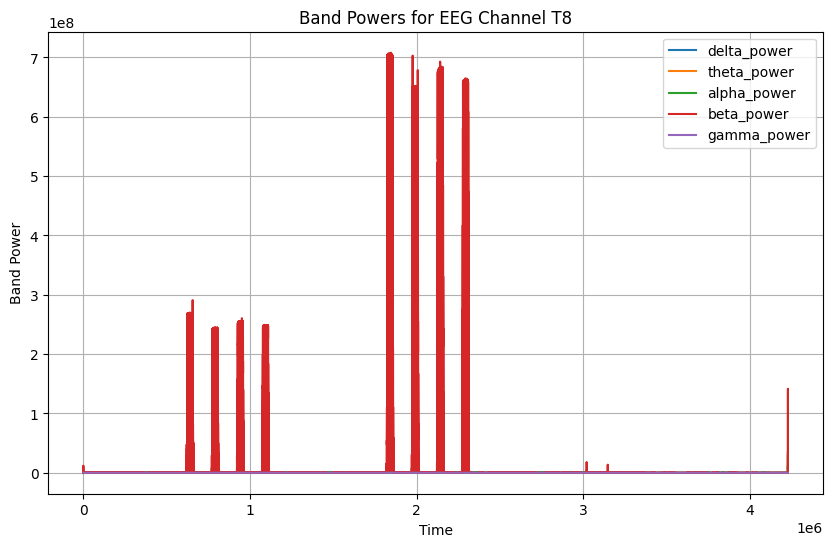

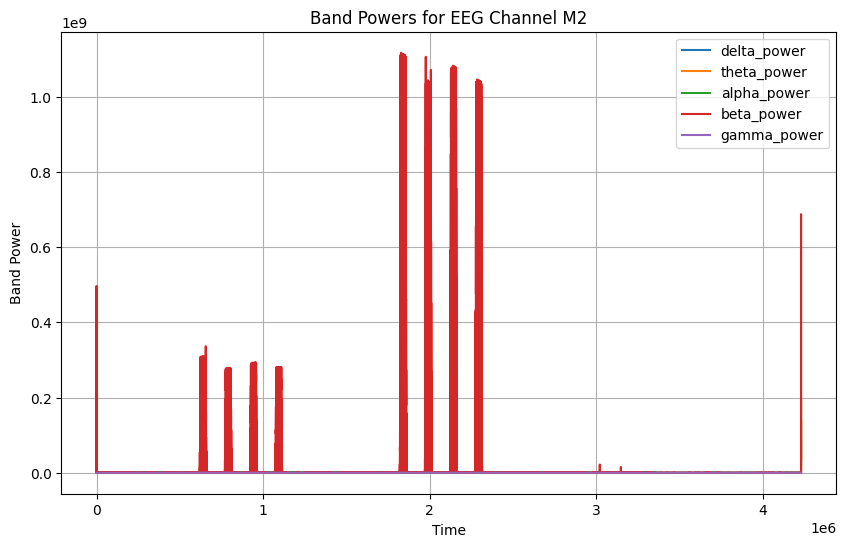

In [ ]:
import numpy as np
import pywt
from concurrent.futures import ProcessPoolExecutor

# List of EEG channel names
eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

# Set up the folder path to save the results
results_folder_path = '/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/'

# Initialize a dictionary to store the band powers for each channel
band_powers_dict = {}

# Loop through each EEG channel
for channel_index, eeg_channel in enumerate(eeg_channels):
    eeg_data = eeg_data_array[:, channel_index]
    
    frequencies = np.logspace(np.log10(0.1), np.log10(30), num=100)
    coefficients, _ = pywt.cwt(eeg_data, frequencies, wavelet='morl')
    psd = np.abs(coefficients)**2
    
    delta_band = (0.1, 4)
    theta_band = (4, 8)
    alpha_band = (8, 13)
    beta_band = (13, 30)
    gamma_band = (30, 100)
    
    delta_indices = (frequencies >= delta_band[0]) & (frequencies <= delta_band[1])
    theta_indices = (frequencies >= theta_band[0]) & (frequencies <= theta_band[1])
    alpha_indices = (frequencies >= alpha_band[0]) & (frequencies <= alpha_band[1])
    beta_indices = (frequencies >= beta_band[0]) & (frequencies <= beta_band[1])
    gamma_indices = (frequencies >= gamma_band[0]) & (frequencies <= gamma_band[1])
    
    psd = psd.T
    
    delta_power = np.trapz(psd[:, delta_indices], axis=1)
    theta_power = np.trapz(psd[:, theta_indices], axis=1)
    alpha_power = np.trapz(psd[:, alpha_indices], axis=1)
    beta_power = np.trapz(psd[:, beta_indices], axis=1)
    gamma_power = np.trapz(psd[:, gamma_indices], axis=1)
    
    band_powers_dict[eeg_channel] = {
        "delta_power": delta_power,
        "theta_power": theta_power,
        "alpha_power": alpha_power,
        "beta_power": beta_power,
        "gamma_power": gamma_power
    }

# Save the band powers for all EEG channels as a single numpy file
results_file = "BandPowers_x.npy"
np.save(results_folder_path + results_file, band_powers_dict)

# List of frequency bands
frequency_bands = ['delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power']

# Loop through each EEG channel and plot band powers
for channel, band_powers in band_powers_dict.items():
    plt.figure(figsize=(10, 6))
    
    for band in frequency_bands:
        plt.plot(band_powers[band], label=band)
    
    plt.xlabel('Time')
    plt.ylabel('Band Power')
    plt.title(f'Band Powers for EEG Channel {channel}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Load and print head

In [ ]:
# Load the band powers data from the .npy file
band_powers_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/BandPowers_x.npy', allow_pickle=True).item()

# Print the populated keys in band_powers_data
print("Populated keys in band_powers_data:", list(band_powers_data.keys()))

# Print the first few elements of the band powers data for each channel
for channel, band_powers in band_powers_data.items():
    print(f"Channel: {channel}")
    for band, powers in band_powers.items():
        print(f"{band}: {powers[:10]}")  # Print the first 10 elements of each band power
    print("-" * 40)  # Separator

# Short-Time Fourier Transform

<div style="font-size: 13px; font-family: 'Times New Roman', Times, serif; background-color: #181818; color: #D0D0D0; padding: 20px; border-radius: 8px; margin: 10px; display: flex; flex-wrap: nowrap; justify-content: space-between;">
    <!-- Column 1 -->
    <div style="flex: 1; margin-right: 10px;">
        <h2>Introduction</h2>
        <p>This analysis adopts the Short-Time Fourier Transform (STFT) approach to break down Electroencephalogram (EEG) signals across multiple channels into their constituent frequencies. The objective is to represent these signals in both the time and frequency domain.</p>
        <h2>Objectives</h2>
        <ul>
            <li>Perform STFT on EEG data for each channel.</li>
            <li>Convert the magnitude spectrum to decibels (dB).</li>
            <li>Visualize the resulting spectrograms for various EEG channels.</li>
        </ul>
        <h2>Mathematical Foundations</h2>
        <h3>Short-Time Fourier Transform (STFT)</h3>
        \[ \text{STFT}(x(t)) = X(f, \tau) = \int_{-\infty}^{\infty} x(t) w(t-\tau) e^{-j 2\pi f t} dt \]
        <p>Where \( X(f, \tau) \) is the STFT, \( x(t) \) is the time-domain EEG signal, \( w(t) \) is the window function, \( \tau \) is the time shift, and \( f \) is the frequency.</p>        
        <h3>Conversion to Decibels</h3>
        \[ \text{STFT}_{\text{dB}} = 10 \log_{10} \left| \text{STFT}(x(t)) \right| \]
        <p>This conversion allows for a logarithmic representation of the amplitude, enhancing the visibility of lower amplitude spectral components.</p>
    </div>
    <!-- Column 2 -->
    <div style="flex: 1; margin-left: 10px;">
        <h2>Methodology</h2>
        <ul>
            <li>EEG data from each channel is isolated for analysis.</li>
            <li>The window size for STFT is set to 2 seconds, given the sampling frequency.</li>
            <li>STFT is performed using the Scipy library's <code>stft</code> function.</li>
            <li>The resulting STFT data is converted to dB for better interpretability.</li>
            <li>The STFT data for each channel is stored in a Python dictionary.</li>
        </ul>
        <h2>Data Serialization</h2>
        <p>The processed STFT data for each EEG channel is serialized and stored as a single NumPy file for later retrieval and analysis.</p>
        <h2>Scientific and Clinical Relevance</h2>
        <p>The derived spectrograms can serve as valuable diagnostic tools in clinical neuroscience to assess brain functions. They may facilitate the diagnosis and monitoring of various neurological disorders, thereby providing key insights for therapeutic strategies.</p>       
        <h2>Conclusion</h2>
        <p>The STFT approach offers a robust methodology for EEG data analysis, enabling the time-frequency representation of electrical activity in the brain. This holds significant potential for enhancing our comprehension of neural oscillations and for the clinical interpretation of EEG data.</p>
    </div>
</div>

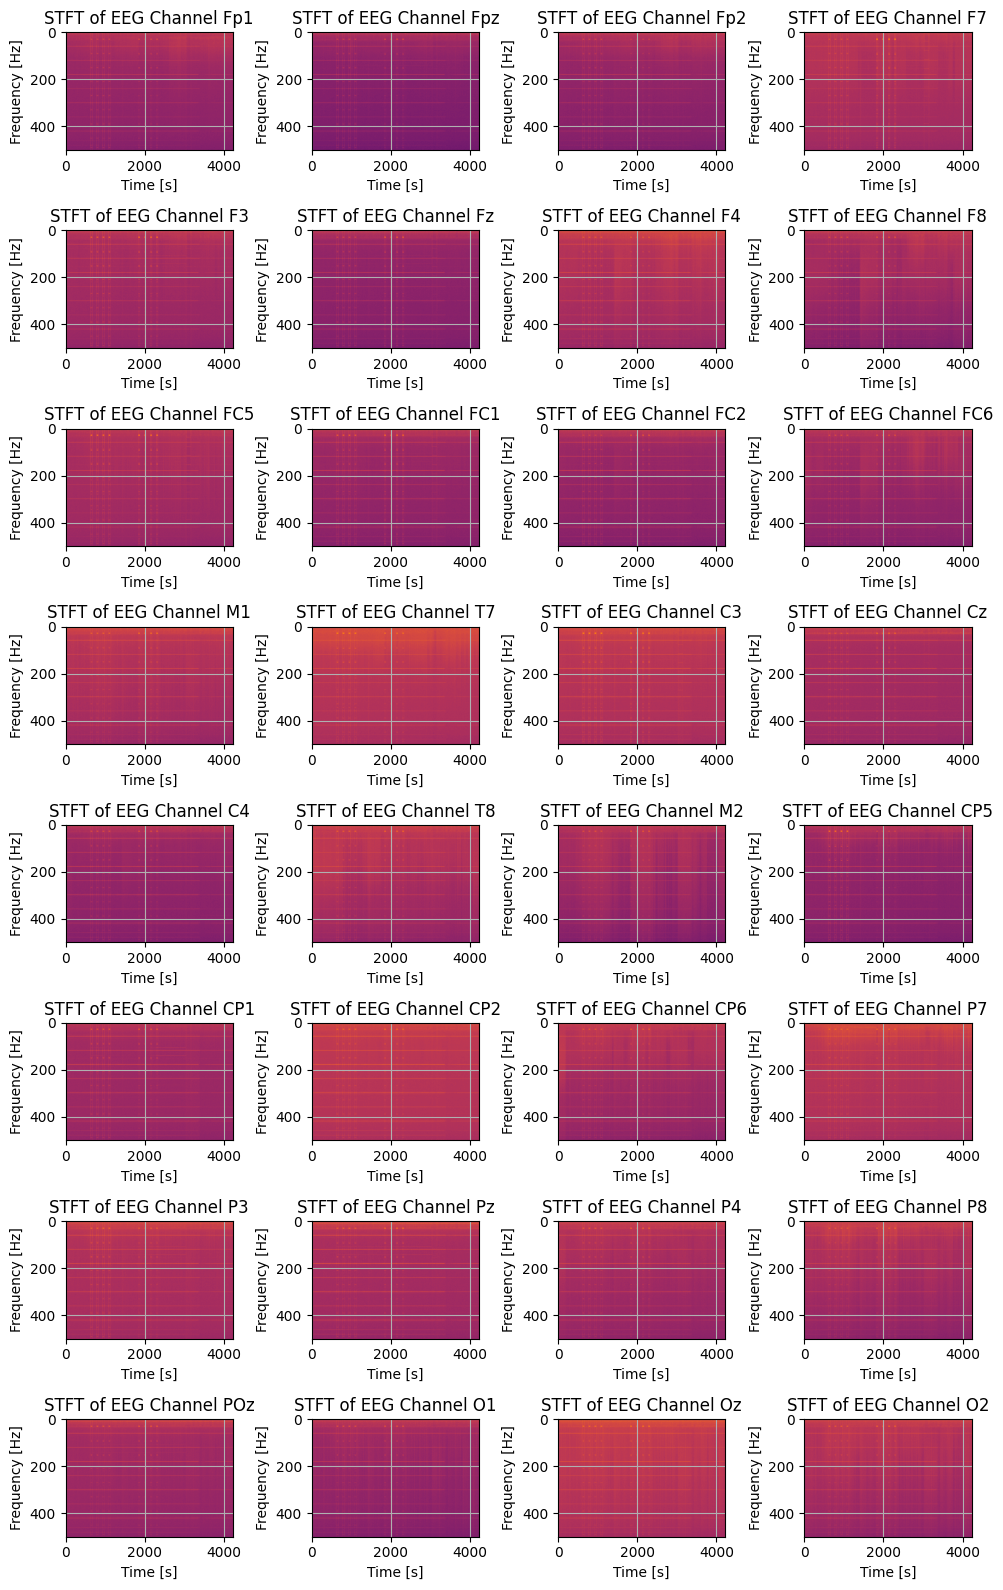

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# List of EEG channel names
eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

# Given sampling frequency (fs)
fs = 1000

# Set up the folder path to save the results
results_folder_path = '/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/'

# Initialize a dictionary to store the STFT data for each channel
stft_data_dict = {}

# Loop through each EEG channel
for channel_index, channel in enumerate(eeg_channels):
    # Select EEG data from the current channel
    eeg_data = eeg_data_array[:, channel_index]
    
    # Define the window size for STFT (in samples)
    window_size = int(fs * 2)  # 2 seconds window
    
    # Calculate the STFT
    frequencies, time_intervals, stft_data = stft(eeg_data, fs=fs, nperseg=window_size)
    
    # Convert the power data to dB
    stft_log = 10 * np.log10(np.abs(stft_data))
    
    # Store the STFT data in the dictionary
    stft_data_dict[channel] = stft_log

# Save the STFT data for all EEG channels as a single numpy file
results_file = "STFT_x.npy"
save_path = results_folder_path + results_file
np.save(save_path, stft_data_dict)

# Plot the STFT for all EEG channels as heatmaps
num_rows = (len(eeg_channels) + 3) // 4
num_cols = min(len(eeg_channels), 4)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 2 * num_rows))
axs = axs.ravel()

for i, channel in enumerate(eeg_channels):
    axs[i].imshow(stft_data_dict[channel], aspect='auto', cmap='inferno', extent=[time_intervals[0], time_intervals[-1], frequencies[-1], frequencies[0]])
    axs[i].set_title(f'STFT of EEG Channel {channel}')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel('Frequency [Hz]')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

# Load and print head

In [13]:
# Load the STFT data from the .npy file
stft_data_dict = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/STFT_x.npy', allow_pickle=True).item()

# Print the populated keys in stft_data_dict
print("Populated keys in stft_data_dict:", list(stft_data_dict.keys()))

# Print the head of the STFT data for each channel
for channel, stft_data in stft_data_dict.items():
    print(f"Channel: {channel}")
    print("STFT Data Head:\n", stft_data[:5, :5])  # Print the first 5x5 elements of the STFT data
    print("-" * 40)  # Separator

Populated keys in stft_data_dict: ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']
Channel: Fp1
STFT Data Head:
 [[40.27901945 43.29048063 43.28785317 43.2881181  43.28799363]
 [39.35955148 40.28244249 40.27744403 40.2779645  40.27983077]
 [36.54919092  8.603578    3.26600537  3.90668066  6.39865184]
 [33.53588172  1.65269743  3.56612725  3.59269255  1.49211544]
 [32.56910091 -5.74842057  2.33775801  0.43557077  5.49345519]]
----------------------------------------
Channel: Fpz
STFT Data Head:
 [[40.02955408 43.04172304 43.04265591 43.0431437  43.04170909]
 [39.11016478 40.03324688 40.0322741  40.0332208  40.0313992 ]
 [36.30036833  7.42972488  0.73115213  3.92005784  6.6991942 ]
 [33.2884759   2.70316693  3.10957463  2.40067522  2.73091441]
 [32.32110838 -1.737353    2.19002358 -1.43695075  3.91454148]]
----------------------------

# Spectral Entropy

<div style="font-size: 13px; font-family: 'Times New Roman', Times, serif; background-color: #181818; color: #D0D0D0; padding: 20px; border-radius: 8px; margin: 10px; display: flex; flex-wrap: nowrap; justify-content: space-between;">
    <!-- Column 1 -->
    <div style="flex: 1; margin-right: 10px;">
        <h2>Introduction</h2>
        <p>Utilising Welch's method, an adaptation of Fourier Transform designed for reducing noise and improving spectral estimate accuracy, the EEG data is transposed from the time to the frequency domain. This is achieved using the `welch` function from the `scipy.signal` library with a sampling frequency \( f_s \) of 1000 Hz and a segment length \( n_{\text{perseg}} \) of 2000 samples. The output is a power spectral density (PSD), \( P_{xx} \), which is then normalised to serve as a probability density function (PDF). Mathematically, the Shannon spectral entropy \( H \) is calculated as:</p>
        <p>
        \[
        H = -\sum_{i} p(x_i) \log_2 p(x_i)
        \]
        </p>
        <p>Where \( p(x_i) \) are the probabilities corresponding to the power at each frequency bin in \( P_{xx} \). Shannon's entropy serves as an apt measure to gauge the complexity and variability inherent in neural signals. </p>
    </div>
    <!-- Column 2 -->
    <div style="flex: 1; margin-left: 10px;">
        <p>In the neuroscientific sphere, the algorithm interrogates EEG channels that span strategic cortical regions, thereby permitting an enriched understanding of different cognitive and motor functions. Spectral entropy functions as an incisive index for assessing neural complexity and has found applications in delineating various mental states such as relaxation, attention, and cognitive load, as well as pathological states including epilepsy and Alzheimer's disease. </p>
        <p>The code is structured to iterate through each EEG channel, calculate its power spectral density, normalise this density, and derive its spectral entropy. These entropy values are meticulously stored in a Python dictionary, which dovetails with the code's modular architecture. Finally, the spectral entropy values are visualised through a bar graph, offering an intuitive medium for channel-wise comparisons. This is enabled through Python libraries like `numpy`, `matplotlib`, and `scipy`, thus amalgamating computational efficacy with rigorous mathematical and neuroscientific reasoning.</p>
    </div>
</div>

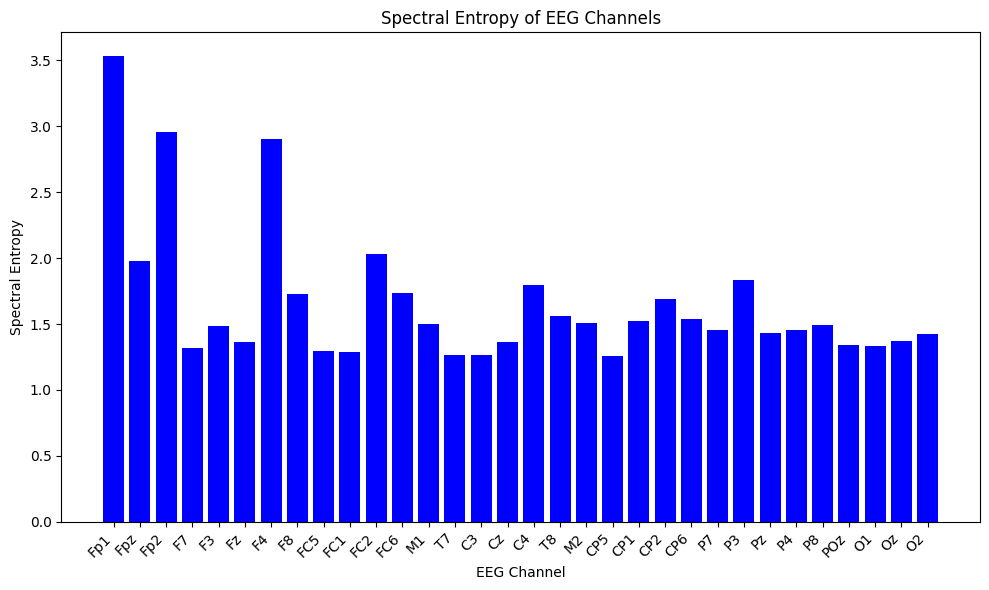

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# List of EEG channel names
eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

# Given sampling frequency (fs)
fs = 1000

# Set up the folder path to save the results
results_folder_path = '/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/'

# Initialize a dictionary to store the spectral entropy for each channel
spectral_entropy_dict = {}

# Loop through each EEG channel
for channel in eeg_channels:
    # Select EEG data from the current channel
    eeg_data = eeg_data_array[:, eeg_channels.index(channel)]
    
    # Calculate the power spectral density using Welch's method
    f, Pxx = welch(eeg_data, fs=fs, nperseg=fs*2)
    
    # Normalize the power spectrum
    normalized_Pxx = Pxx / np.sum(Pxx)
    
    # Calculate the spectral entropy
    spectral_entropy = -np.sum(normalized_Pxx * np.log2(normalized_Pxx))
    
    # Store the spectral entropy in the dictionary
    spectral_entropy_dict[channel] = spectral_entropy

# Save the spectral entropy values as a numpy array
results_file = "SpectralEntropy_x.npy"
np.save(results_folder_path + results_file, spectral_entropy_dict)

# Extract channel names and corresponding spectral entropy values
channels = list(spectral_entropy_dict.keys())
entropy_values = list(spectral_entropy_dict.values())

# Plot the spectral entropy values
plt.figure(figsize=(10, 6))
plt.bar(channels, entropy_values, color='b')
plt.xlabel('EEG Channel')
plt.ylabel('Spectral Entropy')
plt.title('Spectral Entropy of EEG Channels')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

# Load and print head

In [12]:
# Load the spectral entropy data from the .npy file
spectral_entropy_dict = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/SpectralEntropy_x.npy', allow_pickle=True).item()

# Print the populated keys in spectral_entropy_dict
print("Populated keys in spectral_entropy_dict:", list(spectral_entropy_dict.keys()))

# Print the spectral entropy values for each channel
for channel, spectral_entropy in spectral_entropy_dict.items():
    print(f"Channel: {channel}")
    print(f"Spectral Entropy: {spectral_entropy}")
    print("-" * 40)  # Separator

Populated keys in spectral_entropy_dict: ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']
Channel: Fp1
Spectral Entropy: 3.5366970108625324
----------------------------------------
Channel: Fpz
Spectral Entropy: 1.9779195403191885
----------------------------------------
Channel: Fp2
Spectral Entropy: 2.9556473260041014
----------------------------------------
Channel: F7
Spectral Entropy: 1.317390997528914
----------------------------------------
Channel: F3
Spectral Entropy: 1.4828749659869962
----------------------------------------
Channel: Fz
Spectral Entropy: 1.364216888653762
----------------------------------------
Channel: F4
Spectral Entropy: 2.907933081431448
----------------------------------------
Channel: F8
Spectral Entropy: 1.7293493323116478
----------------------------------------
Channel: FC5
Spectral Entropy: 1.2

# Coherence

<div style="font-size: 13px; font-family: 'Times New Roman', Times, serif; background-color: #181818; color: #D0D0D0; padding: 20px; border-radius: 8px; margin: 10px; display: flex; flex-wrap: nowrap; justify-content: space-between;">
    <!-- Column 1 -->
    <div style="flex: 1; margin-right: 10px;">
        <h2>Introduction</h2>
        <p>This code performs a nuanced analysis of EEG coherence using the Continuous Wavelet Transform (CWT). Unlike the Fourier Transform, which assumes stationarity in signals, CWT allows for the local analysis of non-stationary signals, a property which makes it quite pertinent for EEG analysis. Mathematically, CWT for a signal \( x(t) \) is defined as:</p>
        \[
        W(a, b) = \int x(t)\psi_{a,b}(t)dt
        \]
        <p>where \( \psi_{a,b}(t) \) is the Morlet wavelet, and \( a \) and \( b \) are the scale and translation parameters, respectively. Here, \( psd1 \) and \( psd2 \) are the power spectral densities of two EEG channels, derived from the squared magnitude of their wavelet coefficients.</p>
        <p>The coherence \( C(f) \) between two signals \( x \) and \( y \) in frequency domain \( f \) is given by:</p>
        \[
        C(f) = \frac{|P_{xy}(f)|^2}{P_{xx}(f) \times P_{yy}(f)}
        \]
        <p>Where \( P_{xy} \) is the cross-power spectral density, and \( P_{xx} \) and \( P_{yy} \) are the auto-power spectral densities of \( x \) and \( y \) respectively. These are computed in the code by the expressions \( \text{np.abs(cross\_psd)}^2 \) and \( \text{psd1} \times \text{psd2} \), thereby aligning precisely with the mathematical underpinning of coherence.</p>
    </div>
    <!-- Column 2 -->
    <div style="flex: 1; margin-left: 10px;">
        <p>From a neuroscientific viewpoint, the algorithm scrutinises a plethora of EEG channels positioned across key neural substrates. The objective is to calculate inter-channel coherence, which is a measure of how well the frequency components of different channels are related to each other. Coherence can elucidate on neural synchronization and has applications in studying cognitive functions, such as attention and memory, as well as neurological disorders like epilepsy.</p>
        <p>Upon extracting the wavelet coefficients for each channel, the algorithm calculates the power spectral density and cross-power spectral density to arrive at the coherence value. These steps are encapsulated in a modular loop that iterates through each channel, effectuating a pairwise comparison, thereby yielding a coherence matrix. The numerical results are then visualised through heatmaps, offering a robust visual representation of inter-channel coherence. By employing Python libraries such as `numpy`, `pywt`, and `matplotlib`, the code offers a perfect blend of mathematical rigor, computational efficiency, and neuroscientific relevance.</p>
        <p>In essence, the program serves as an advanced toolkit for understanding neural oscillations, bringing together wavelet analysis and coherence metrics to offer high-resolution insights into brain dynamics.</p>
    </div>
</div>

In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# List of EEG channel names
eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

# Define the sampling frequency
fs = 1000

# Create a time array for the data
time = np.arange(len(eeg_data_array)) / fs

# Define the frequencies at which to compute the wavelet transform
frequencies = np.logspace(np.log10(10), np.log10(fs/2), num=100)  # Adjust the scale range as needed

# Initialize a dictionary to store the coherence results for each channel pair
coherence_results = {}

# Loop through each channel and calculate coherence with other channels
for channel1 in eeg_channels:
    eeg_data1 = eeg_data_array[:, eeg_channels.index(channel1)]
    coefficients1, frequencies = pywt.cwt(eeg_data1, frequencies, wavelet='morl')
    psd1 = np.abs(coefficients1)**2

    # Initialize a list to store coherence results for the current channel
    channel_coherence = []

    for channel2 in eeg_channels:
        eeg_data2 = eeg_data_array[:, eeg_channels.index(channel2)]
        coefficients2, frequencies = pywt.cwt(eeg_data2, frequencies, wavelet='morl')
        psd2 = np.abs(coefficients2)**2

        # Compute the cross-power spectral density between channel1 and channel2
        cross_psd = np.conj(coefficients1) * coefficients2

        # Compute the coherence between channel1 and channel2
        coherence = np.abs(cross_psd)**2 / (psd1 * psd2)

        # Add the coherence to the list for the current channel
        channel_coherence.append(coherence)

    # Convert the list of coherences to a 2D array and store in the dictionary
    coherence_results[channel1] = np.array(channel_coherence)

# Set a lower threshold for the colormap
for channel in coherence_results:
    threshold = np.percentile(coherence_results[channel], 5)
    coherence_results[channel][coherence_results[channel] < threshold] = threshold

# Plot and save the coherence for each channel pair (Optional)
for channel1 in eeg_channels:
    for channel2 in eeg_channels:
        coherence = coherence_results[channel1][eeg_channels.index(channel2)]
        plt.imshow(coherence, extent=[0, len(eeg_data_array), frequencies[-1], frequencies[0]], aspect='auto', cmap='inferno')
        plt.colorbar(label='Coherence')
        plt.xlabel('Time [s]')
        plt.ylabel('Frequency [Hz]')
        plt.title(f'Coherence between EEG Channels {channel1} and {channel2}')
        plt.show()

# Save the coherence results as a numpy array
results_path = "/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/"
results_file = "Coherence_x.npy"
np.save(results_path + results_file, coherence_results)

# Load and print head

In [ ]:
# Load the coherence results data from the .npy file
coherence_results = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/Coherence_x.npy', allow_pickle=True).item()

# Print the populated keys in coherence_results
print("Populated keys in coherence_results:", list(coherence_results.keys()))

# Print the coherence results for the first few channel pairs
for channel1, coherence_matrix in coherence_results.items():
    for channel2, coherence_values in coherence_matrix.items():
        print(f"Channels: {channel1}, {channel2}")
        print("Coherence values:")
        print(coherence_values[:10])  # Print the first 10 coherence values
        print("-" * 40)  # Separator

# Spectral Centroids

<div style="font-size: 13px; font-family: 'Times New Roman', Times, serif; background-color: #181818; color: #D0D0D0; padding: 20px; border-radius: 8px; margin: 10px; display: flex; flex-wrap: nowrap; justify-content: space-between;">
    <!-- Column 1 -->
    <div style="flex: 1; margin-right: 10px;">
        <h2>Introduction</h2>
        <p>This code aims to assess the spectral characteristics of EEG data by calculating the spectral centroid for each channel. The spectral centroid is a feature that is often used to describe a frequency spectrum and serves as a sort of 'center of mass' for the spectrum. Understanding this feature can give us insights into the characteristics of the EEG signal in different brain regions.</p>
         <p>The Fourier Transform allows us to convert our time-domain signal into its frequency domain representation. Mathematically, it is expressed as:</p>
        \[
        F(f) = \int_{-\infty}^{\infty} x(t) e^{-2\pi ift} dt
        \]
        <p>This transformation is implemented in the code using the <code>scipy.fft.fft</code> function, which provides us with \( F(f) \), the Fourier Transform of the signal.</p>
    </div>
    <!-- Column 2 -->
    <div style="flex: 1; margin-left: 10px;">
               <p>Once in the frequency domain, the spectral centroid \( C \) for a signal is calculated as:</p>
        \[
        C = \frac{\sum_{n=0}^{N-1} f(n) \times |X(f(n))|}{\sum_{n=0}^{N-1} |X(f(n))|}
        \]
        <p>Here, \( f(n) \) are the frequencies associated with the Fourier Transform values. These frequencies are generated by the function <code>scipy.fft.fftfreq</code> in the code. \( |X(f(n))| \) represents the magnitude of the Fourier Transform at those frequencies, calculated as the absolute value of the complex Fourier coefficients.</p>
        <p>The spectral centroid provides a weighted average of the frequency components, effectively giving us a single scalar that characterizes the distribution of energy across frequencies. In the code, this is stored in the <code>spectral_centroids</code> dictionary, with one entry per EEG channel.</p>
    </div>
</div>


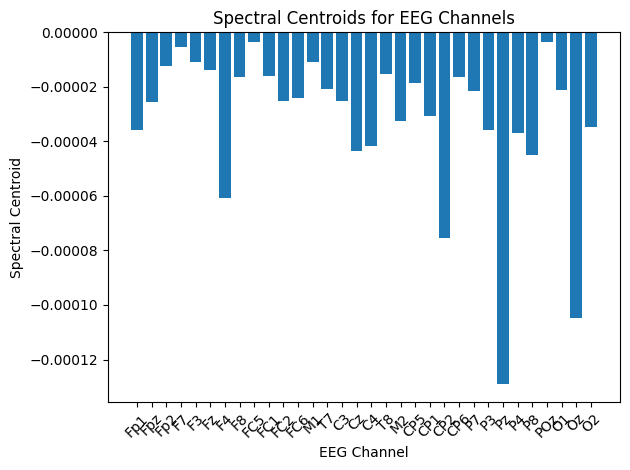

In [12]:
import numpy as np
import scipy.fft
import matplotlib.pyplot as plt

# Define a list of all EEG channel names
eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

# Define the sampling frequency
fs = 1000

# Initialize a dictionary to store the spectral centroids for each channel
spectral_centroids = {}

# Loop through each channel and calculate spectral centroid
for channel in eeg_channels:
    eeg_data = eeg_data_array[:, eeg_channels.index(channel)]  # Get the data from the array
    
    # Perform Fourier transform on the data
    fft_result = scipy.fft.fft(eeg_data)
    
    # Generate frequencies associated with the Fourier transform values
    frequencies = scipy.fft.fftfreq(len(eeg_data), 1.0/fs)

    # Calculate the absolute values of the Fourier transform results
    magnitude = np.abs(fft_result)
    
    # Compute the spectral centroid
    spectral_centroid = np.sum(frequencies * magnitude) / np.sum(magnitude)
    
    # Add the spectral centroid to the dictionary
    spectral_centroids[channel] = spectral_centroid

# Now, you have the spectral_centroids dictionary that contains spectral centroids for each channel

# Save the spectral centroid results as a numpy array
results_path = "/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/"
results_file = "SpectralCentroids_x.npy"
np.save(results_path + results_file, spectral_centroids)

# Plot the spectral centroids for each EEG channel
plt.bar(spectral_centroids.keys(), spectral_centroids.values())
plt.xlabel('EEG Channel')
plt.ylabel('Spectral Centroid')
plt.title('Spectral Centroids for EEG Channels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Load and print head


In [10]:
# Load the spectral centroid data from the .npy file
spectral_centroids = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/SpectralCentroids_x.npy', allow_pickle=True).item()

# Print the populated keys in spectral_centroids
print("Populated keys in spectral_centroids:", list(spectral_centroids.keys()))

# Print the spectral centroids for the first few EEG channels
for channel, centroid in spectral_centroids.items():
    print(f"Channel: {channel}")
    print(f"Spectral Centroid: {centroid}")
    print("-" * 40)  # Separator

Populated keys in spectral_centroids: ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']
Channel: Fp1
Spectral Centroid: -3.593545514225202e-05
----------------------------------------
Channel: Fpz
Spectral Centroid: -2.5613096597273488e-05
----------------------------------------
Channel: Fp2
Spectral Centroid: -1.2315445713774716e-05
----------------------------------------
Channel: F7
Spectral Centroid: -5.486266942743079e-06
----------------------------------------
Channel: F3
Spectral Centroid: -1.099901629376439e-05
----------------------------------------
Channel: Fz
Spectral Centroid: -1.3855468322777812e-05
----------------------------------------
Channel: F4
Spectral Centroid: -6.075408543040463e-05
----------------------------------------
Channel: F8
Spectral Centroid: -1.639654923447864e-05
--------------------------------

# Frequency of Maximum Power

<div style="font-size: 13px; font-family: 'Times New Roman', Times, serif; background-color: #181818; color: #D0D0D0; padding: 20px; border-radius: 8px; margin: 10px; display: flex; flex-wrap: nowrap; justify-content: space-between;">
    <!-- Column 1 -->
    <div style="flex: 1; margin-right: 10px;">
        <h2>Introduction</h2>
        <p>This code calculates and visualizes the frequency at which maximum power occurs in the spectrum of EEG signals for multiple channels. By identifying these peak frequencies, one can understand which frequency components dominate the EEG signals for each channel, providing valuable insights into brain activity.</p>
            <div style="flex: 1; margin-left: 10px;">
        <p>Similar to the spectral centroid, the Fourier Transform is used here to move from the time-domain to the frequency domain. The formula for the Fourier Transform remains the same:</p>
        \[
        F(f) = \int_{-\infty}^{\infty} x(t) e^{-2\pi ift} dt
        \]
        <p>In this case, however, the focus is on identifying the frequency at which the power spectral density (PSD) peaks. The power spectral density for each frequency \( f \) is given by \( |F(f)|^2 \).</p>
    </div>
    <!-- Column 2 -->
        <p>The frequency \( f_{\text{peak}} \) at which the power is maximum can be mathematically expressed as:</p>
        \[
        f_{\text{peak}} = \text{argmax}_{f \geq 0} \left( |F(f)|^2 \right)
        \]
        <p>In the code, this peak frequency is computed using NumPy's <code>argmax</code> function on the absolute value of the positive half of the Fourier spectrum. It is stored in a dictionary called <code>peak_frequencies</code>, one for each EEG channel.</p>
        <p>Each channel's power spectral density is also plotted in log-log scale, and the peak frequency is marked on the graph. This allows for better visualization of the power-law distribution commonly seen in natural signals like EEG.</p>
    </div>
</div>

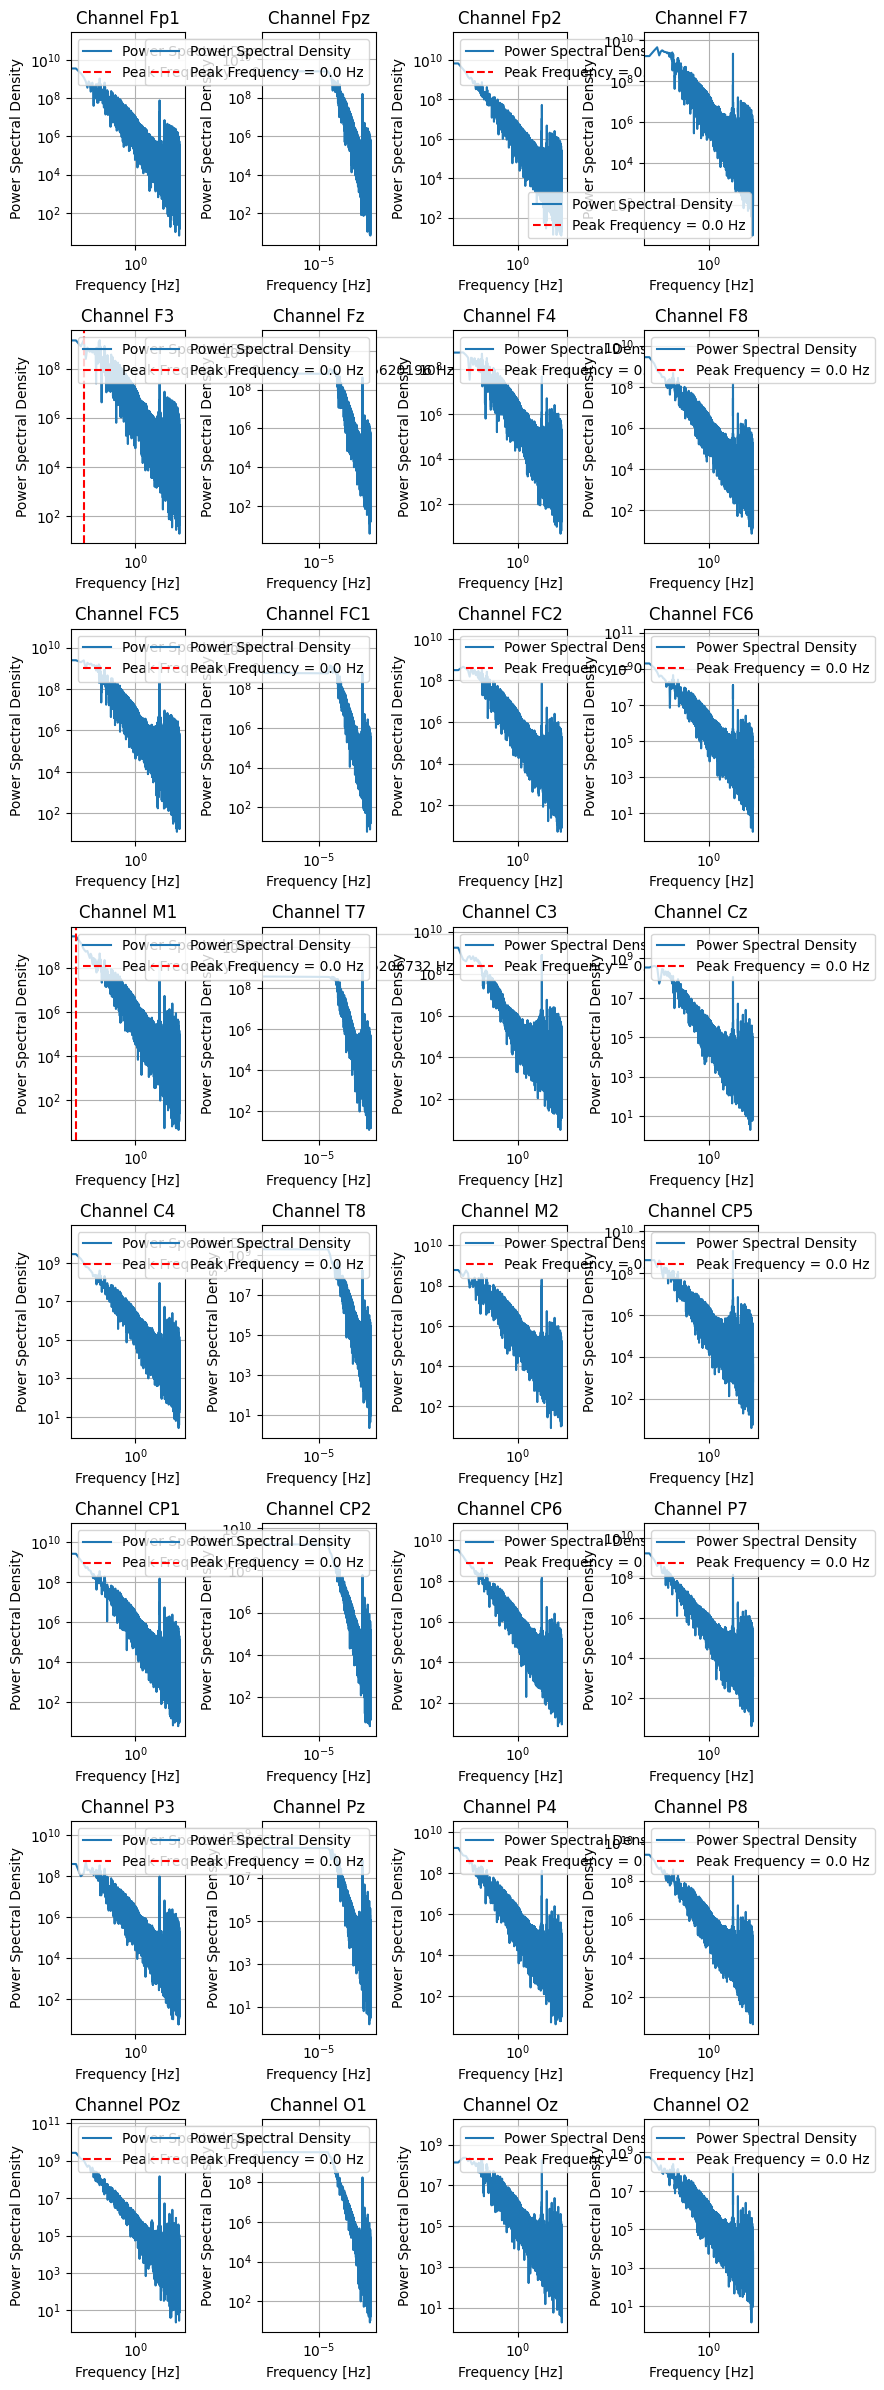

In [19]:
import numpy as np
import scipy.fft
import matplotlib.pyplot as plt

# Define a list of all EEG channel names
eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

# Define the sampling frequency
fs = 1000

# Initialize a dictionary to store the frequencies of maximum power for each channel
peak_frequencies = {}

# Set up the figure layout
num_rows = (len(eeg_channels) + 3) // 4
num_cols = 4

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))
axs = axs.ravel()

# Loop through each channel and calculate frequency of maximum power
for i, channel in enumerate(eeg_channels):
    eeg_data = eeg_data_array[:, eeg_channels.index(channel)]  # Get the data from the array

    # Perform Fourier transform on the data
    fft_result = scipy.fft.fft(eeg_data)

    # Generate frequencies associated with the Fourier transform values
    frequencies = scipy.fft.fftfreq(len(eeg_data), 1.0/fs)

    # Keep only the positive frequencies (since the spectrum is symmetric)
    positive_frequencies = frequencies[frequencies >= 0]
    positive_fft_result = fft_result[frequencies >= 0]

    # Find the frequency where the absolute value of the Fourier transform is maximum
    peak_frequency = positive_frequencies[np.argmax(np.abs(positive_fft_result))]

    # Add the peak frequency to the dictionary
    peak_frequencies[channel] = peak_frequency

    # Plot the power spectral density and mark the peak frequency
    axs[i].plot(positive_frequencies, np.abs(positive_fft_result), label='Power Spectral Density')
    axs[i].axvline(peak_frequency, color='r', linestyle='--', label=f'Peak Frequency = {peak_frequency} Hz')
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    axs[i].set_title(f'Channel {channel}')
    axs[i].set_xlabel('Frequency [Hz]')
    axs[i].set_ylabel('Power Spectral Density')
    axs[i].legend()
    axs[i].grid(True)

# Adjust spacing and layout
plt.tight_layout()
plt.show()

# Save the peak frequencies as a numpy array
results_path = "/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/"
results_file = "PeakFrequencies_x.npy"
np.save(results_path + results_file, peak_frequencies)

# Load and print head


In [9]:
# Load the peak frequency data from the .npy file
peak_frequencies = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/PeakFrequencies_x.npy', allow_pickle=True).item()

# Print the populated keys in peak_frequencies
print("Populated keys in peak_frequencies:", list(peak_frequencies.keys()))

# Print the peak frequencies for the first few EEG channels
for channel, peak_frequency in peak_frequencies.items():
    print(f"Channel: {channel}")
    print(f"Peak Frequency: {peak_frequency} Hz")
    print("-" * 40)  # Separator

Populated keys in peak_frequencies: ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']
Channel: Fp1
Peak Frequency: 0.0 Hz
----------------------------------------
Channel: Fpz
Peak Frequency: 0.0 Hz
----------------------------------------
Channel: Fp2
Peak Frequency: 0.0 Hz
----------------------------------------
Channel: F7
Peak Frequency: 0.0 Hz
----------------------------------------
Channel: F3
Peak Frequency: 0.0007095909255620196 Hz
----------------------------------------
Channel: Fz
Peak Frequency: 0.0 Hz
----------------------------------------
Channel: F4
Peak Frequency: 0.0 Hz
----------------------------------------
Channel: F8
Peak Frequency: 0.0 Hz
----------------------------------------
Channel: FC5
Peak Frequency: 0.0 Hz
----------------------------------------
Channel: FC1
Peak Frequency: 0.0 Hz
-----------------

# Spectral Edge Density

<div style="font-size: 13px; font-family: 'Times New Roman', Times, serif; background-color: #181818; color: #D0D0D0; padding: 20px; border-radius: 8px; margin: 10px; display: flex; flex-wrap: nowrap; justify-content: space-between;">
    <!-- Column 1 -->
    <div style="flex: 1; margin-right: 10px;">
        <h2>Introduction</h2>
        <p>This code calculates the spectral edge density for multiple EEG channels. Spectral edge density is a feature commonly used in EEG analysis to locate the frequency below which a certain percentage of the total power in the spectrum resides. This is especially helpful for identifying the dominant frequency components in brain activity.</p>
    </div>
    <!-- Column 2 -->
    <div style="flex: 1; margin-left: 10px;">
        <p>The Fourier Transform is used to transition from the time domain to the frequency domain. The spectral edge density is computed by first finding the total power in the spectrum:</p>
        \[
        P_{\text{total}} = \sum_{f \geq 0} |F(f)|^2
        \]
        <p>We then set a threshold, based on a given percentage (in this code, 95% is used), of the total power:</p>
        \[
        P_{\text{threshold}} = P_{\text{total}} \times \frac{\text{percentage}}{100}
        \]
        <p>We sum the power in descending order of magnitude and identify the frequency at which this sum first exceeds \( P_{\text{threshold}} \). This frequency is the spectral edge density:</p>
        \[
        f_{\text{edge}} = \text{argmax}_{f \geq 0} \left( \text{cumulative sum}(|F(f)|^2) \geq P_{\text{threshold}} \right)
        \]
        <p>The calculated spectral edge density for each EEG channel is stored in a dictionary named <code>spectral_edge_densities</code>.</p>
        <p>The bar chart plots the spectral edge densities across the EEG channels, providing a quick graphical summary. The calculated values are also saved as a numpy array for further analysis.</p>
    </div>
</div>

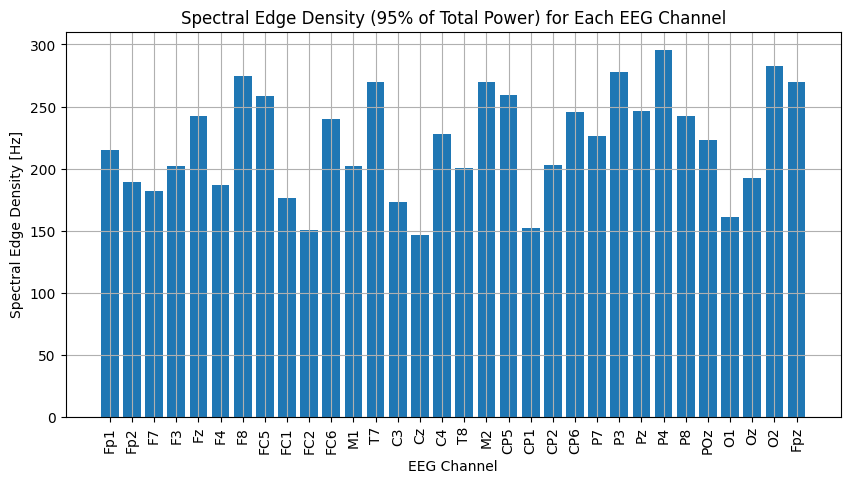

In [21]:
import numpy as np
import scipy.fft
import matplotlib.pyplot as plt

# Define a list of all EEG channel names
eeg_channels = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2',
               'FC6', 'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2',
               'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2', 'Fpz']

# Define the sampling frequency
fs = 1000

# Define the percentage of the total power used to calculate the spectral edge density
percentage = 95

# Initialize a dictionary to store the spectral edge densities for each channel
spectral_edge_densities = {}

# Loop through each channel and calculate spectral edge density
for channel in eeg_channels:
    eeg_data = eeg_data_array[:, eeg_channels.index(channel)]  # Get the data from the array

    # Perform Fourier transform on the data
    fft_result = scipy.fft.fft(eeg_data)

    # Generate frequencies associated with the Fourier transform values
    frequencies = scipy.fft.fftfreq(len(eeg_data), 1.0/fs)

    # Keep only the positive frequencies (since the spectrum is symmetric)
    positive_frequencies = frequencies[frequencies >= 0]
    positive_fft_result = fft_result[frequencies >= 0]

    # Calculate the absolute values of the Fourier transform results
    magnitude = np.abs(positive_fft_result)

    # Sort the magnitude array in descending order
    sorted_magnitude = np.sort(magnitude)[::-1]

    # Calculate the cumulative sum of the sorted magnitude array
    cumulative_sum = np.cumsum(sorted_magnitude)

    # Calculate the threshold based on the specified percentage of total power
    total_power = np.sum(magnitude)
    threshold = total_power * percentage / 100

    # Find the frequency where the cumulative sum first exceeds the threshold
    spectral_edge = positive_frequencies[np.argmax(cumulative_sum >= threshold)]

    # Add the spectral edge density to the dictionary
    spectral_edge_densities[channel] = spectral_edge

# Plot the spectral edge densities for each channel
plt.figure(figsize=(10, 5))
plt.bar(spectral_edge_densities.keys(), spectral_edge_densities.values())
plt.title(f'Spectral Edge Density ({percentage}% of Total Power) for Each EEG Channel')
plt.xlabel('EEG Channel')
plt.ylabel('Spectral Edge Density [Hz]')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Save the spectral edge densities as a numpy array
results_path = "/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/"
results_file = "SpectralEdgeDensities_x.npy"
np.save(results_path + results_file, spectral_edge_densities)

# Load and print head

In [8]:
# Load the spectral edge density data from the .npy file
spectral_edge_densities = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/SpectralEdgeDensities_x.npy', allow_pickle=True).item()

# Print the populated keys in spectral_edge_densities
print("Populated keys in spectral_edge_densities:", list(spectral_edge_densities.keys()))

# Print the spectral edge densities for the first few EEG channels
for channel, spectral_edge_density in spectral_edge_densities.items():
    print(f"Channel: {channel}")
    print(f"Spectral Edge Density: {spectral_edge_density} Hz")
    print("-" * 40)  # Separator

Populated keys in spectral_edge_densities: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2', 'Fpz']
Channel: Fp1
Spectral Edge Density: 214.62878460320147 Hz
----------------------------------------
Channel: Fp2
Spectral Edge Density: 189.3541019559164 Hz
----------------------------------------
Channel: F7
Spectral Edge Density: 181.7248168545821 Hz
----------------------------------------
Channel: F3
Spectral Edge Density: 202.12437331294754 Hz
----------------------------------------
Channel: Fz
Spectral Edge Density: 241.97618234405317 Hz
----------------------------------------
Channel: F4
Spectral Edge Density: 186.44194079740987 Hz
----------------------------------------
Channel: F8
Spectral Edge Density: 274.38556521755584 Hz
----------------------------------------
Channel: FC5
Spectral Edge Density: 258.79845441635194 Hz
--------

# Continuous Wavelet Transform

<div style="font-size: 13px; font-family: 'Times New Roman', Times, serif; background-color: #181818; color: #D0D0D0; padding: 20px; border-radius: 8px; margin: 10px; display: flex; flex-wrap: nowrap; justify-content: space-between;">
    <!-- Column 1 -->
    <div style="flex: 1; margin-right: 10px;">
        <h2>Introduction</h2>
        <p>This code focuses on extracting wavelet coefficients from EEG data across multiple channels. It uses Continuous Wavelet Transform (CWT) for time-frequency analysis. The aim is to identify time-locked events and analyze localized frequency content of the EEG signals.</p>
    </div>
    <!-- Column 2 -->
    <div style="flex: 1; margin-left: 10px;">
        <p>The Continuous Wavelet Transform is used to analyze signals in both the time and frequency domains simultaneously. The wavelet is a small wave that is used to analyze localized variations in a signal. In this code, the 'morl' (Morlet) wavelet is used for transformation.</p>
        \[
        CWT_{x}(a, b) = \frac{1}{\sqrt{|a|}} \int x(t)\psi \left( \frac{t-b}{a} \right) dt
        \]
        <p>Where \( \psi \) is the wavelet function, \( a \) is the scaling parameter, and \( b \) is the translation parameter.</p>
        <p>The CWT is calculated at logarithmically spaced frequencies, making it suitable for analyzing signals that contain components at multiple scales.</p>
        <p>Each channel's wavelet coefficients are stored in a dictionary, <code>wavelet_coefficients</code>, and the coefficients are also visualized using a heatmap. This enables easy comparison between channels and provides a sense of how the frequency content changes over time.</p>
        <p>The wavelet coefficients are saved as a numpy array for subsequent analyses. The output is saved to the directory specified in the <code>results_path</code> and <code>results_file</code> variables.</p>
    </div>
</div>

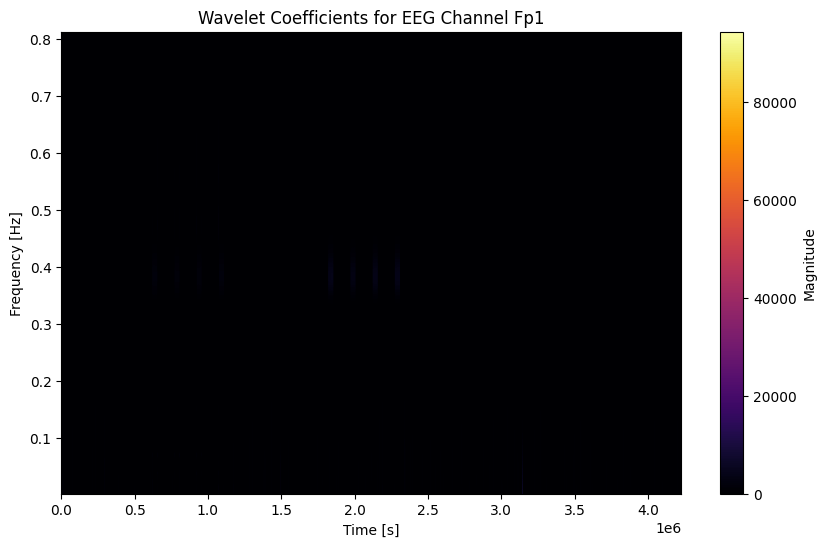

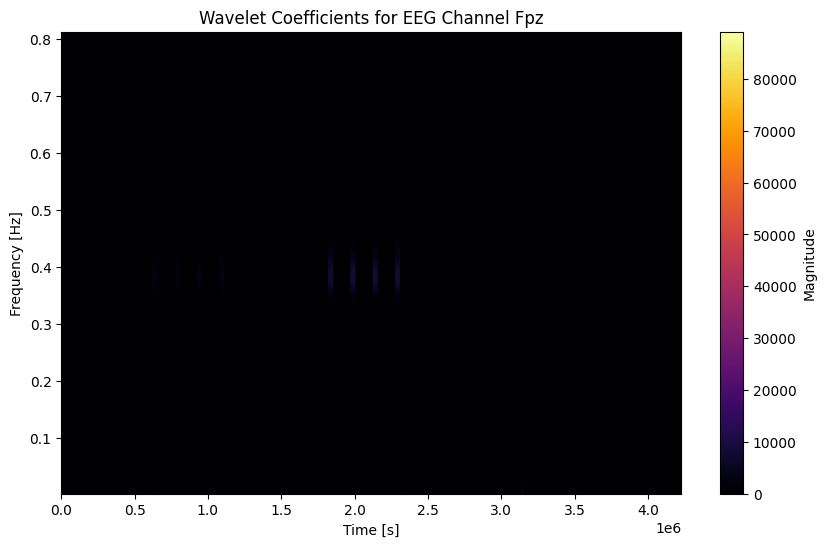

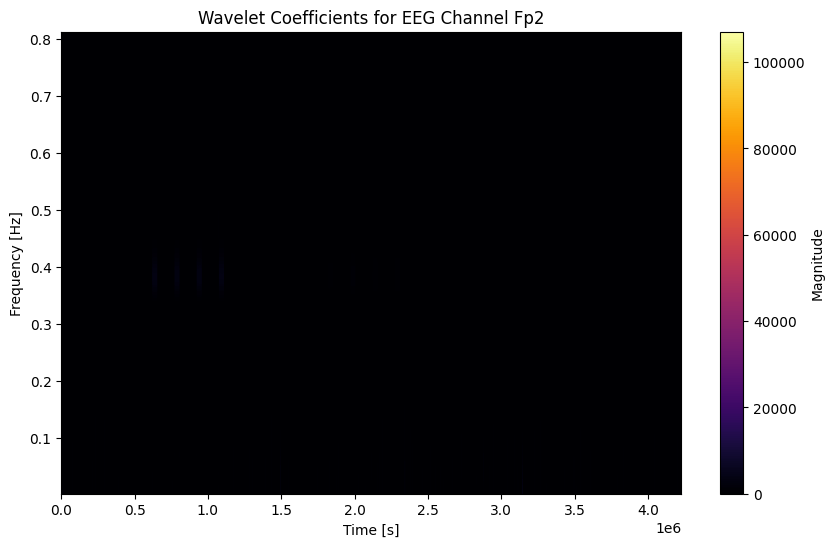

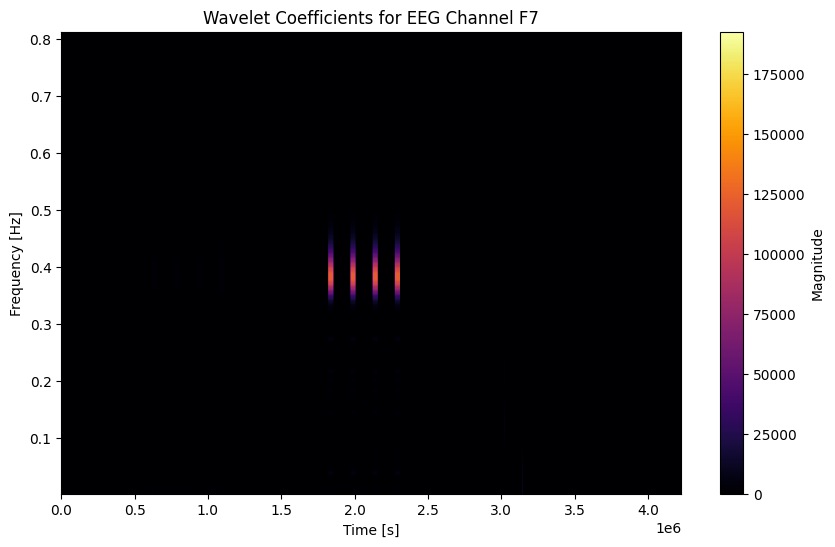

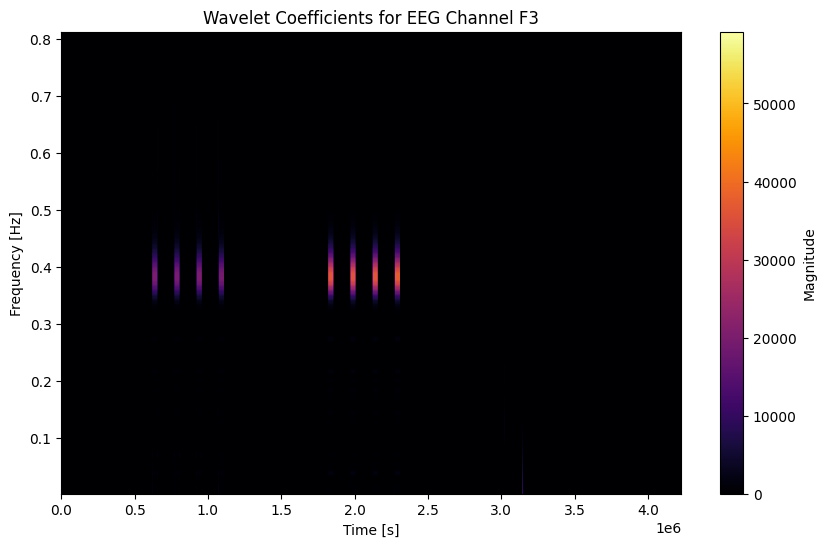

In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Define a list of all EEG channel names
eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

# Define the sampling frequency
fs = 1000  # Adjust this to your actual sampling frequency

# Define the frequencies at which to compute the wavelet transform
frequencies = np.logspace(np.log10(1), np.log10(fs/2), num=100)  # Adjust the scale range as needed

# Initialize a dictionary to store the wavelet coefficients for each channel
wavelet_coefficients = {}

# Loop through each channel and compute wavelet coefficients
for channel in eeg_channels:
    eeg_data = eeg_data_array[:, eeg_channels.index(channel)]  # Get the data from the array
    coefficients, freqs = pywt.cwt(eeg_data, frequencies, wavelet='morl')
    wavelet_coefficients[channel] = coefficients

    # Plot the wavelet coefficients
    plt.figure(figsize=(10, 6))
    plt.imshow(np.abs(coefficients), extent=[0, len(eeg_data), freqs[-1], freqs[0]], aspect='auto', cmap='inferno')
    plt.colorbar(label='Magnitude')
    plt.xlabel('Time [s]')
    plt.ylabel('Frequency [Hz]')
    plt.title(f'Wavelet Coefficients for EEG Channel {channel}')
    plt.show()

# Save the wavelet coefficients as a numpy array
results_path = "/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/"
results_file = "WaveletCoefficients_x.npy"
np.save(results_path + results_file, wavelet_coefficients)

# Load and print head

In [ ]:
# Load the wavelet coefficients data from the .npy file
wavelet_coefficients = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/WaveletCoefficients_x.npy', allow_pickle=True).item()

# Print the populated keys in wavelet_coefficients
print("Populated keys in wavelet_coefficients:", list(wavelet_coefficients.keys()))

# Print the shape of wavelet coefficients for the first EEG channel
first_channel = next(iter(wavelet_coefficients))
coefficients_shape = wavelet_coefficients[first_channel].shape
print(f"Shape of wavelet coefficients for {first_channel}: {coefficients_shape}")

# Print the wavelet coefficients for the first few EEG channels
for channel, coefficients in wavelet_coefficients.items():
    print(f"Channel: {channel}")
    print(f"Wavelet Coefficients Shape: {coefficients.shape}")
    print("-" * 40)  # Separator